In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline
import ast

# Первичный анализ

In [2]:
data = pd.read_csv('EXAM_GR_20/cleaned_data.csv')

In [36]:
data.head()

,Date,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Month
0,2015-12-01,-0.198465,51.505538,Metropolitan Police,Slight,1,1,Monday,1900-01-01 18:45:00,Kensington and Chelsea,...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - light lit,Fine no high winds,Dry,None,None,Urban,Yes,December
1,2015-12-01,-0.178838,51.491836,Metropolitan Police,Slight,1,1,Monday,1900-01-01 07:50:00,Kensington and Chelsea,...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,December
2,2015-12-01,-0.205590,51.514910,Metropolitan Police,Slight,1,1,Monday,1900-01-01 18:08:00,Kensington and Chelsea,...,None within 50 metres,Zebra,Darkness - light lit,Raining no high winds,Wet/Damp,None,None,Urban,Yes,December
3,2015-01-13,-0.208327,51.514952,Metropolitan Police,Slight,1,1,Tuesday,1900-01-01 07:40:00,Kensington and Chelsea,...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet/Damp,None,None,Urban,No,January
4,2015-09-01,-0.206022,51.496572,Metropolitan Police,Serious,2,1,Friday,1900-01-01 07:30:00,Kensington and Chelsea,...,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Raining no high winds,Wet/Damp,None,None,Urban,No,September


| Name\_en                                    | Name\_ru                                                 | Type    |
| ------------------------------------------- | -------------------------------------------------------- | ------- |
| Longitude                                   | Долгота                                                  | float64 |
| Latitude                                    | Широта                                                   | float64 |
| Police Force                                | полицейские силы                                         | object  |
| Accident Severity                           | Тяжесть несчастного случая                               | object  |
| Number of Vehicles                          | Количество транспортных средств                          | int64   |
| Number of Casualties                        | Число жертв                                              | int64   |
| Day of Week                                 | День недели                                              | object  |
| Time                                        | Время                                                    | object  |
| Local Authority (District)                  | Местный орган власти (Район)                             | object  |
| Local Authority (Highway)                   | Местные власти (Шоссе)                                   | object  |
| Road Type                                   | Тип дороги                                               | object  |
| Speed limit                                 | Ограничение скорости                                     | int64   |
| Junction Detail                             | Детали перекрестка                                       | object  |
| Junction Control                            | Контроль перекрестка                                     | object  |
| Pedestrian Crossing-Human Control           | Пешеходный переход - Контроль со стороны Человека        | object  |
| Pedestrian Crossing-Physical Facilities     | Пешеходный Переход - Физические сооружения               | object  |
| Light Conditions                            | Условия освещения                                        | object  |
| Weather Conditions                          | Погодные условия                                         | object  |
| Road Surface Conditions                     | Состояние дорожного Покрытия                             | object  |
| Special Conditions at Site                  | Особые условия на объекте                                | object  |
| Carriageway Hazards                         | Опасности на проезжей части                              | object  |
| Urban or Rural Area                         | Городской или Сельский район                             | object  |
| Did Police Officer Attend Scene of Accident | Присутствовал ли сотрудник полиции на месте происшествия | object  |
| Month                                       | Месяц                                                    | object  |

In [206]:
data.shape

(140056, 25)

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140056 entries, 0 to 140055
Data columns (total 25 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Date                                         140056 non-null  object 
 1   Longitude                                    140056 non-null  float64
 2   Latitude                                     140056 non-null  float64
 3   Police_Force                                 140056 non-null  object 
 4   Accident_Severity                            140056 non-null  object 
 5   Number_of_Vehicles                           140056 non-null  int64  
 6   Number_of_Casualties                         140056 non-null  int64  
 7   Day_of_Week                                  140056 non-null  object 
 8   Time                                         140056 non-null  object 
 9   Local_Authority_(District)                   140056 non-nul

In [208]:
data.Accident_Severity.unique()

array(['Slight', 'Serious', 'Fatal'], dtype=object)

In [209]:
data.columns

Index(['Date', 'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week', 'Time',
       'Local_Authority_(District)', 'Local_Authority_(Highway)', 'Road_Type',
       'Speed_limit', 'Junction_Detail', 'Junction_Control',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Month'],
      dtype='object')

In [3]:
data['Date'] = pd.to_datetime(data['Date'])

In [4]:
data['Hour'] = pd.to_datetime(data['Time']).dt.hour
data['Time'] = pd.to_datetime(data['Time']).dt.time

In [39]:
# data['Year'] = data.Date.dt.year

In [5]:
# data.Month.unique()
list_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September','October',  'November','December']
d = {}
for i in range(12):
    d[list_month[i]] = i+1

data['Month_num'] = data.Month.replace(d)

In [6]:
# data.Day_of_Week.unique()
days = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday','Saturday', 'Sunday']

d = {}
for i in range(7):
    d[days[i]] = i+1

data['Day_of_Week_num'] = data.Day_of_Week.replace(d)

In [11]:
# data.Did_Police_Officer_Attend_Scene_of_Accident.replace({'No_Self_Reported': 'np.nan', 'Yes':1, 'No':0}, inplace = True)

In [7]:
numbers_features = ['Number_of_Vehicles','Number_of_Casualties', 'Speed_limit', 'Longitude', 'Latitude', 'Day_of_Week_num',
                   'Month_num', 'Hour']

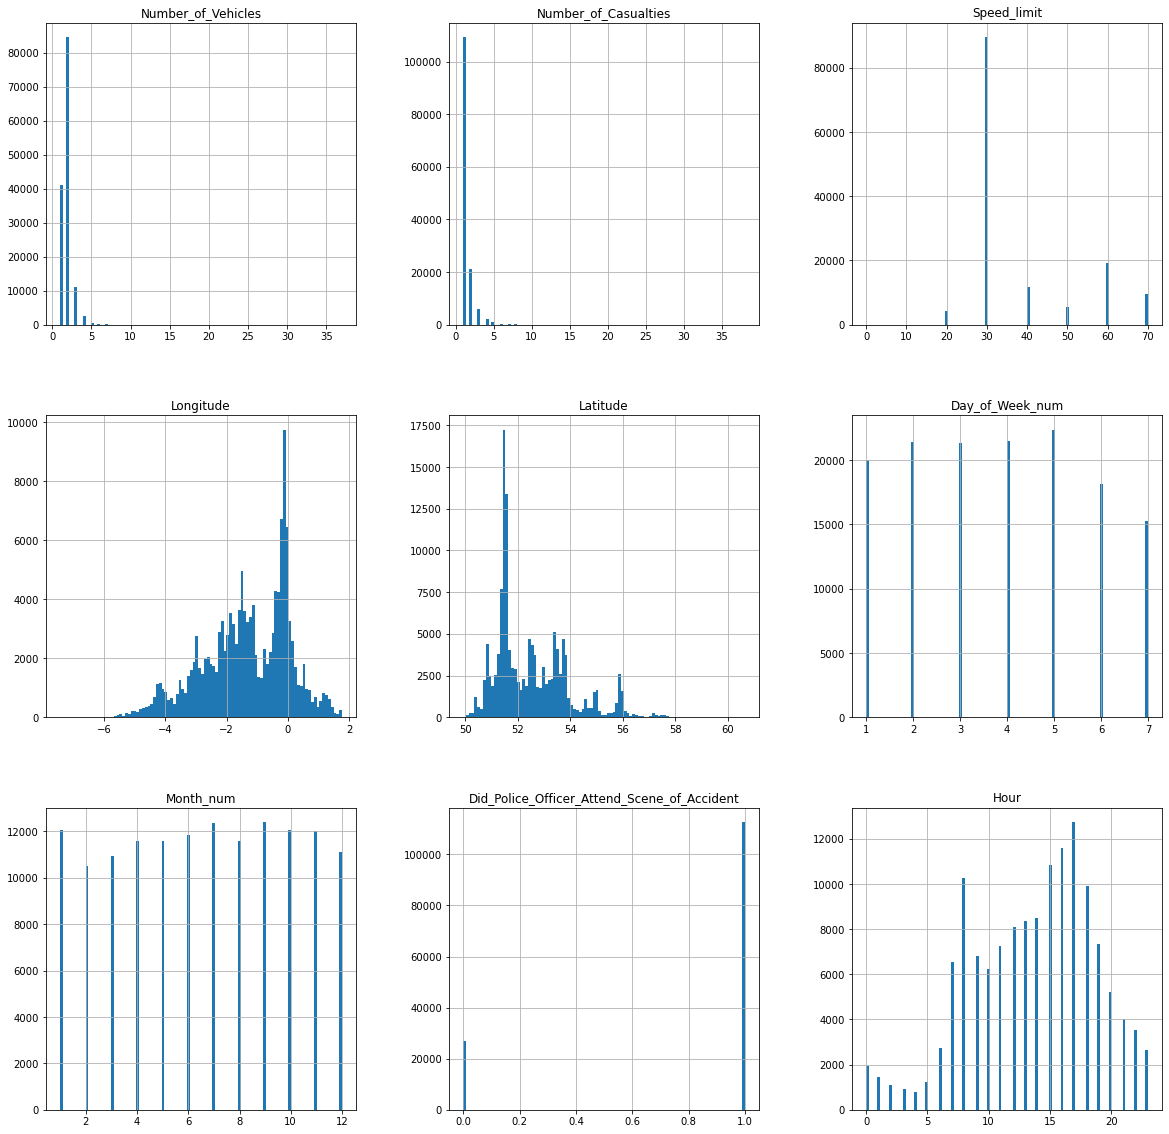

In [217]:
# Код 1. Постройте гистограммы.
data[numbers_features].hist(figsize = (20, 20), bins = 100)
plt.show()

In [16]:
cat_features = ['Police_Force','Day_of_Week', 'Road_Type',
      'Junction_Detail', 'Junction_Control',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area',
       'Month', 'Did_Police_Officer_Attend_Scene_of_Accident']

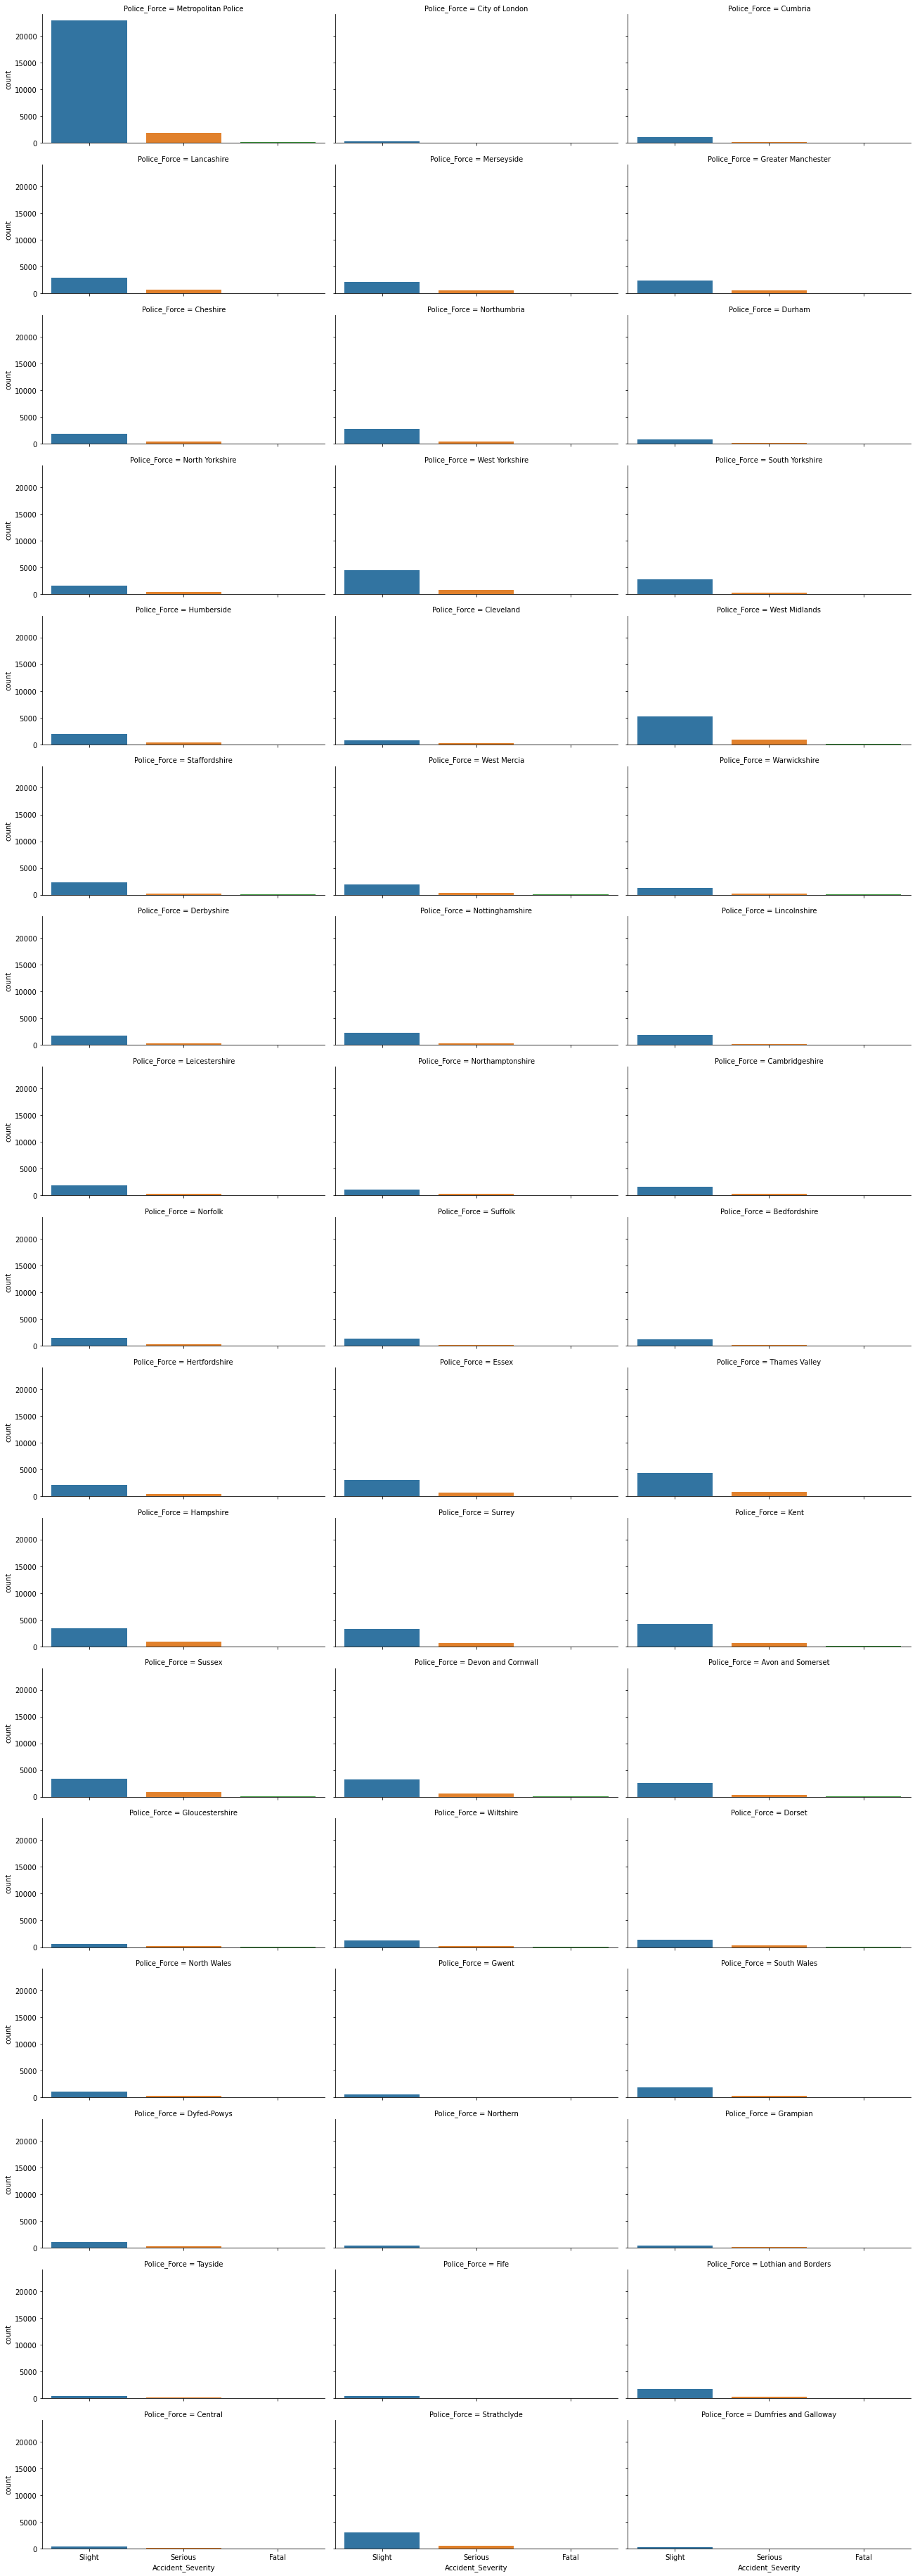

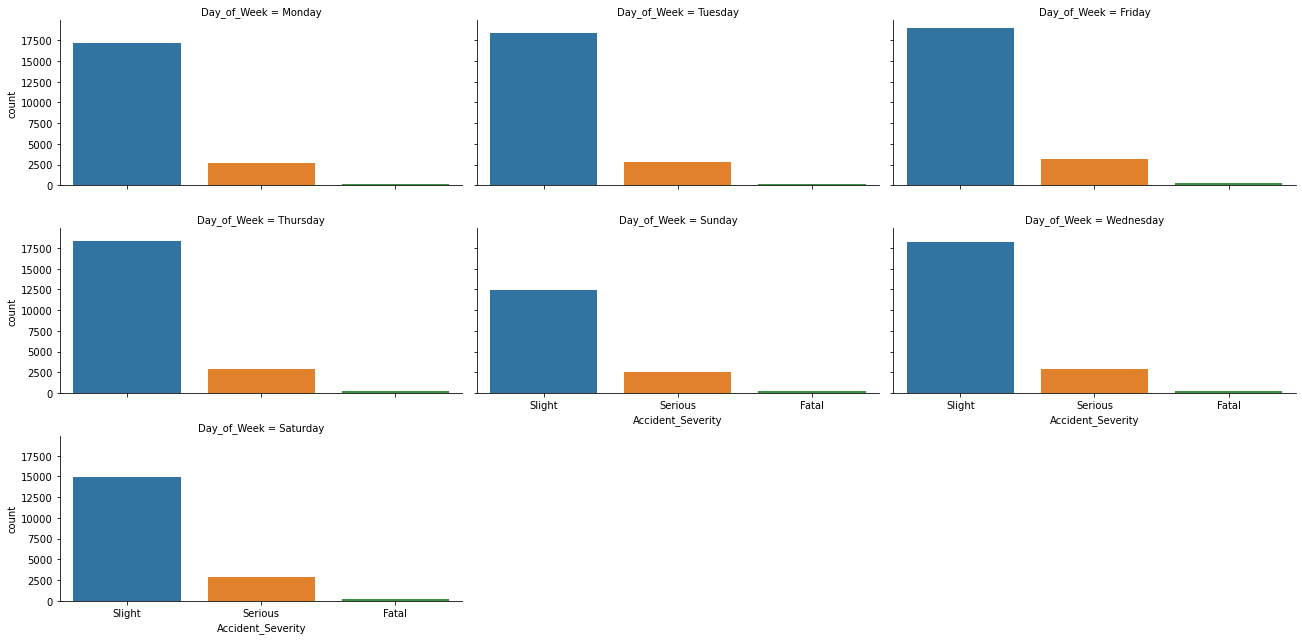

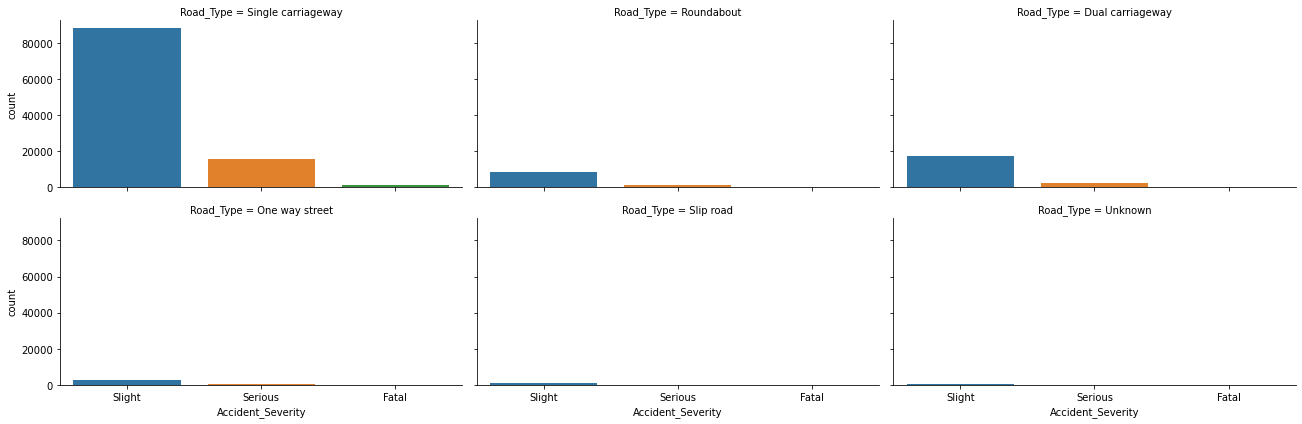

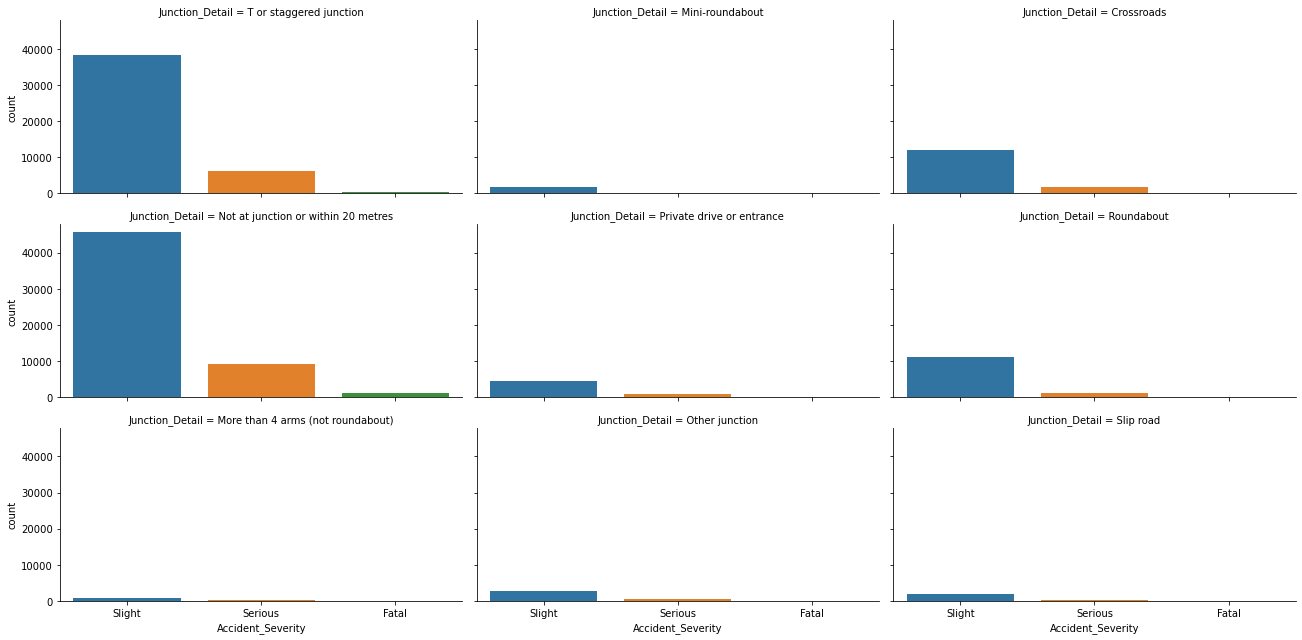

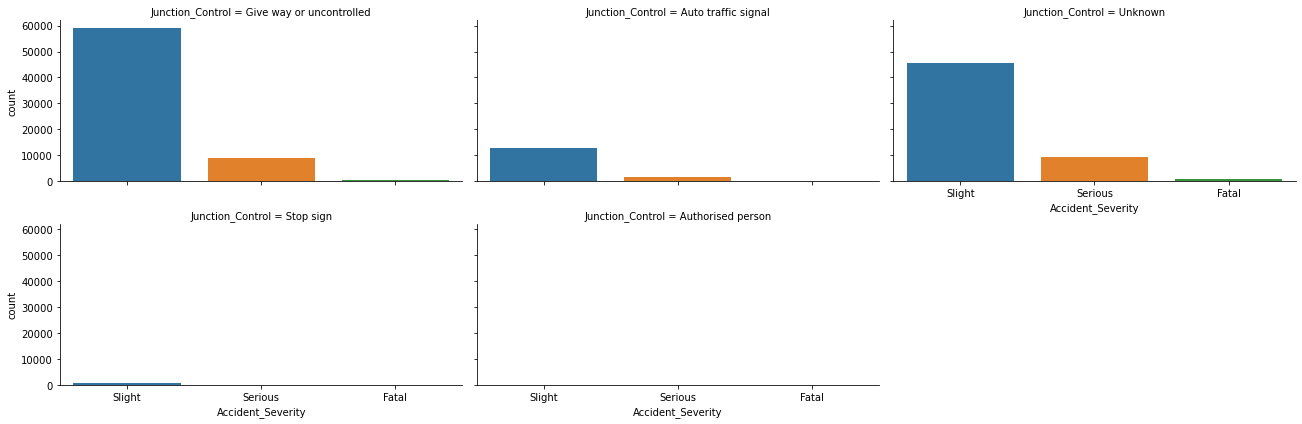

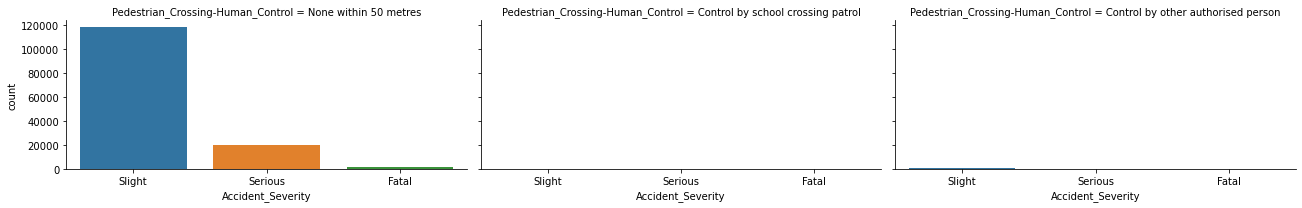

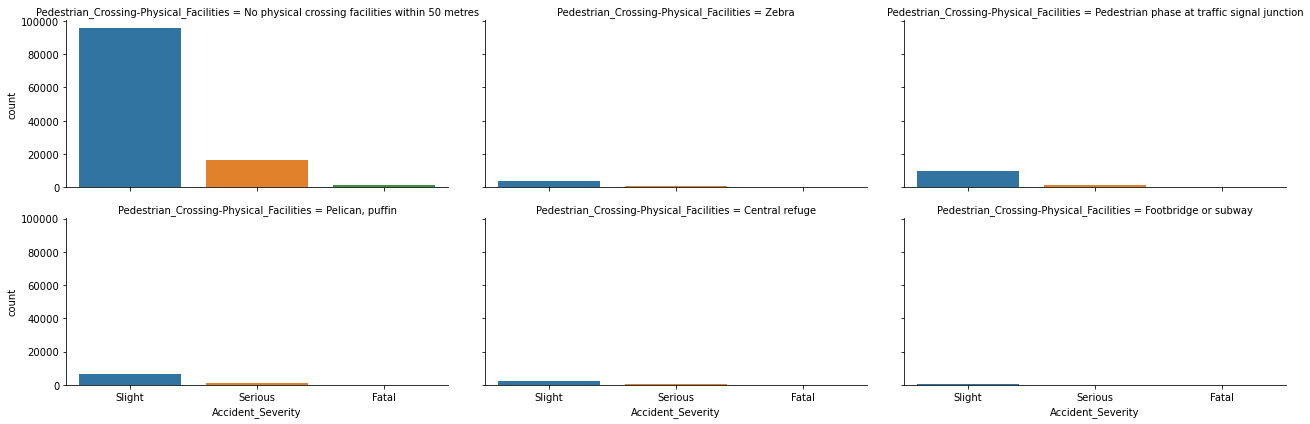

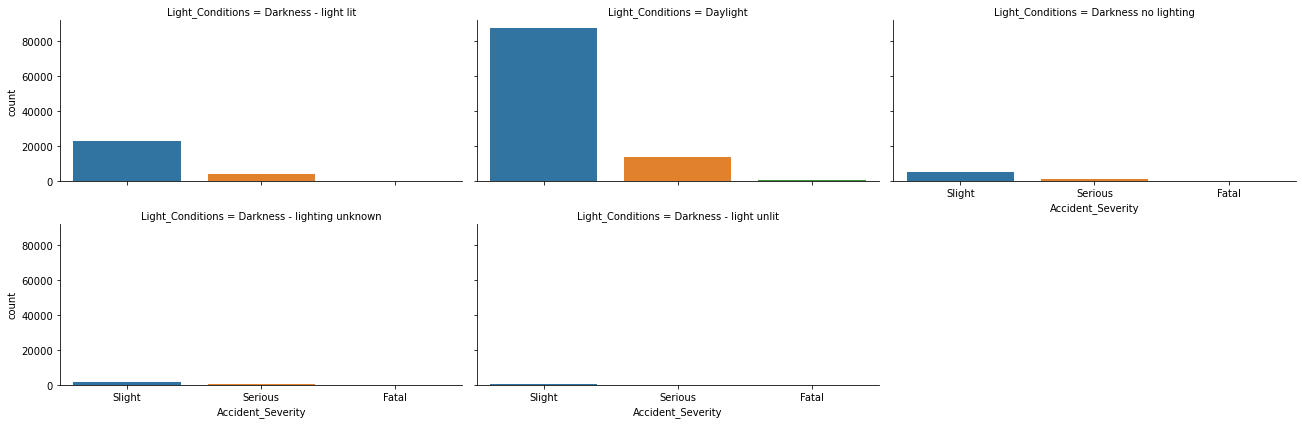

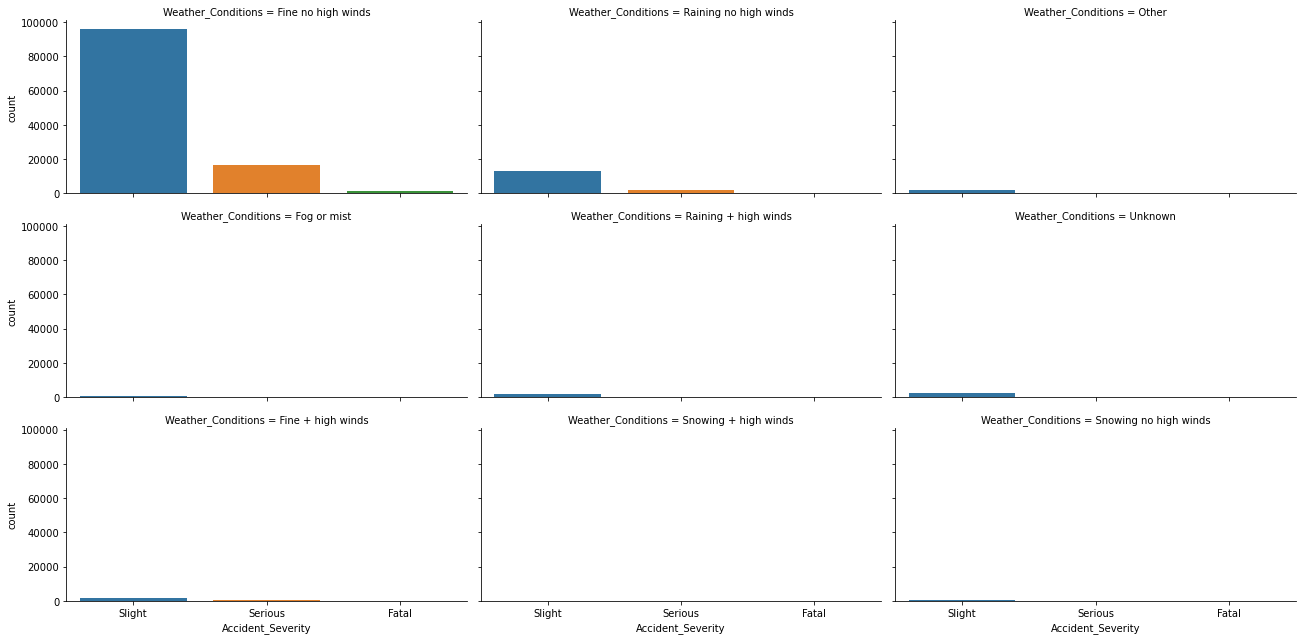

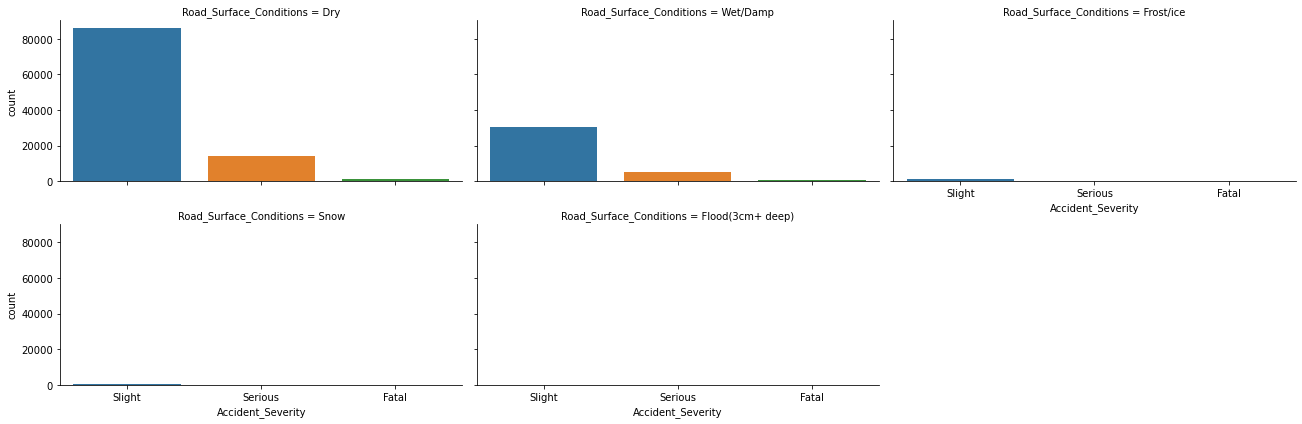

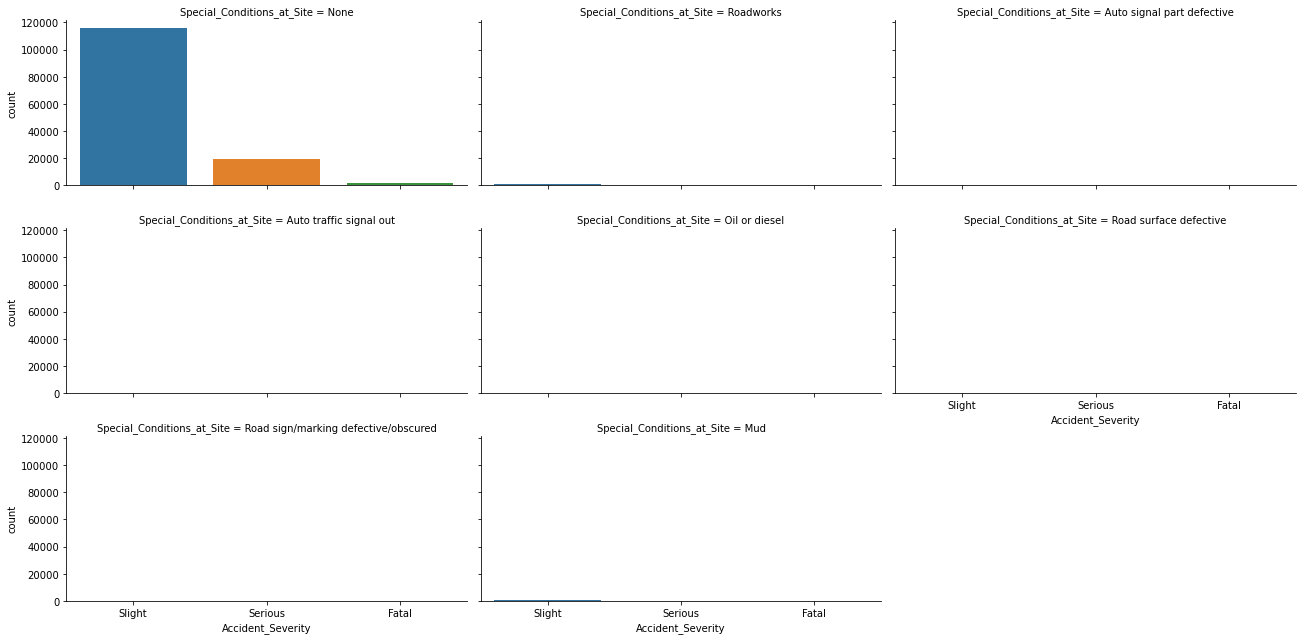

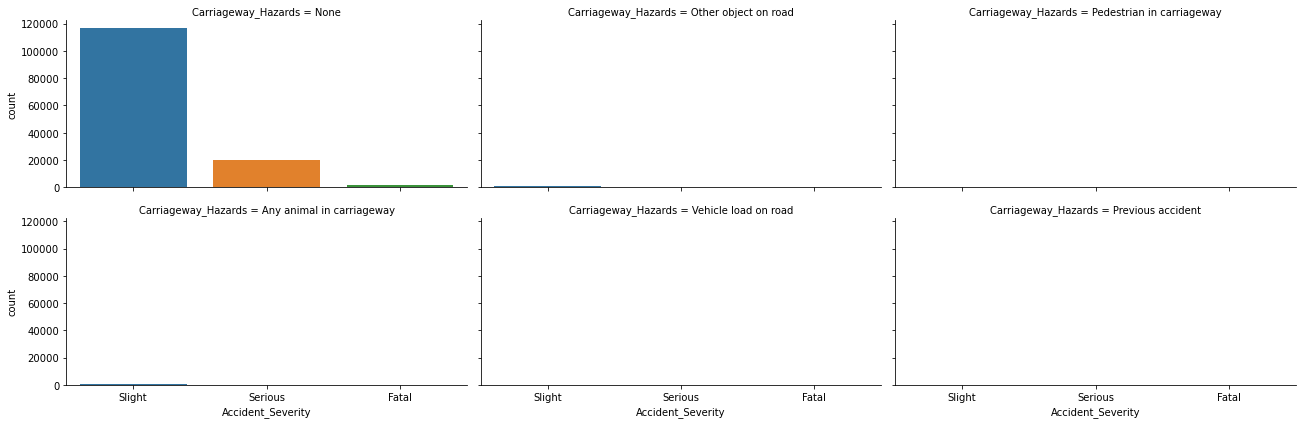

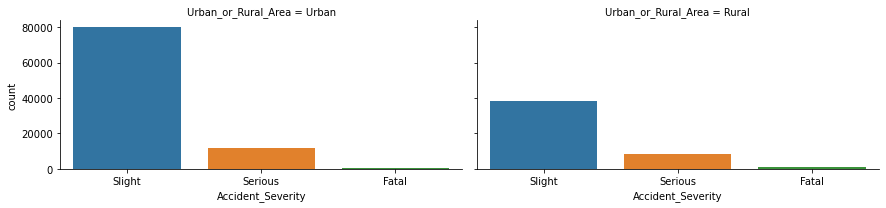

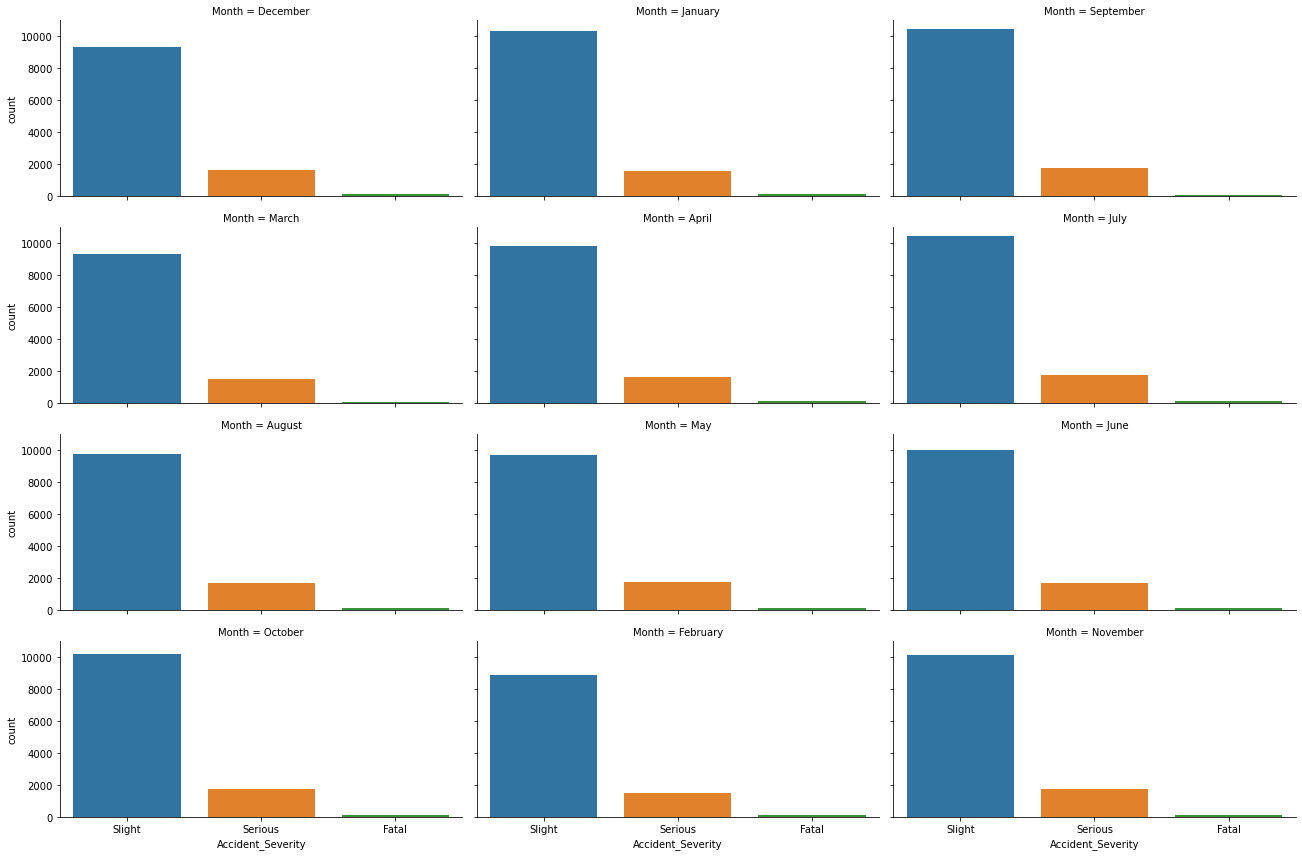

In [13]:
for i in cat_features:
    seaborn.catplot(
        data=data, col=i, x="Accident_Severity", kind="count", col_wrap=3, height=3, aspect=2
    )
    seaborn.set_

In [7]:
import fiona
import shapely
import geopandas as gpd

In [11]:
gdata = gpd.GeoDataFrame(data, geometry = data[['Latitude', 'Longitude']].apply(lambda x: shapely.ops.Point(x[1], x[0]), axis = 1))

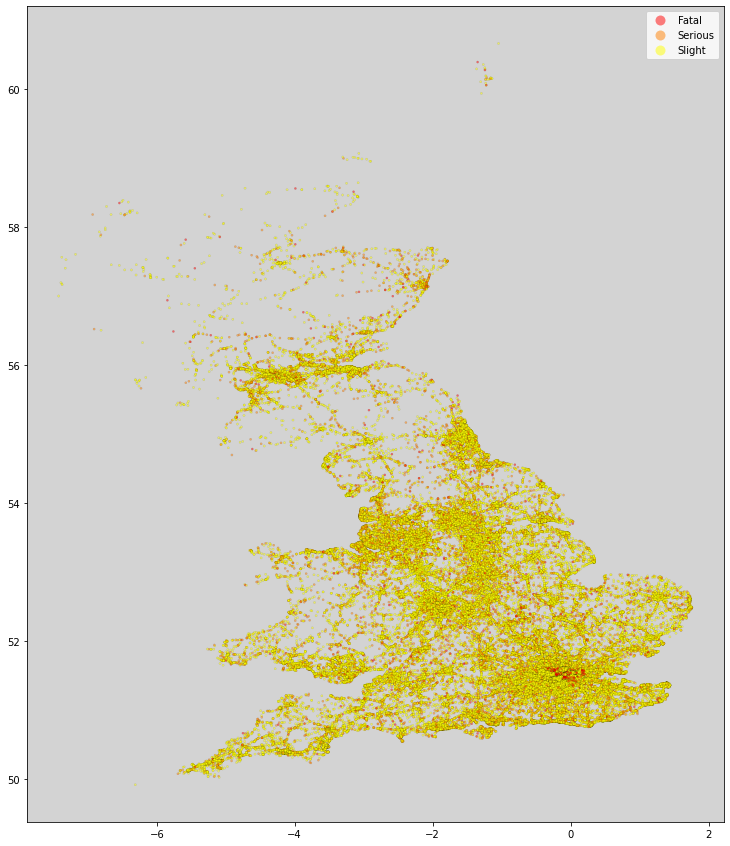

In [27]:
ax = gdata.plot(markersize=5, 
           figsize = (15, 15), 
           column = 'Accident_Severity', 
           alpha = 0.5, 
           legend = True, 
           cmap='autumn', 
           edgecolor = 'black',
           linewidth = 0.1)
ax.set_facecolor('white')

In [48]:
len(cat_features)

17

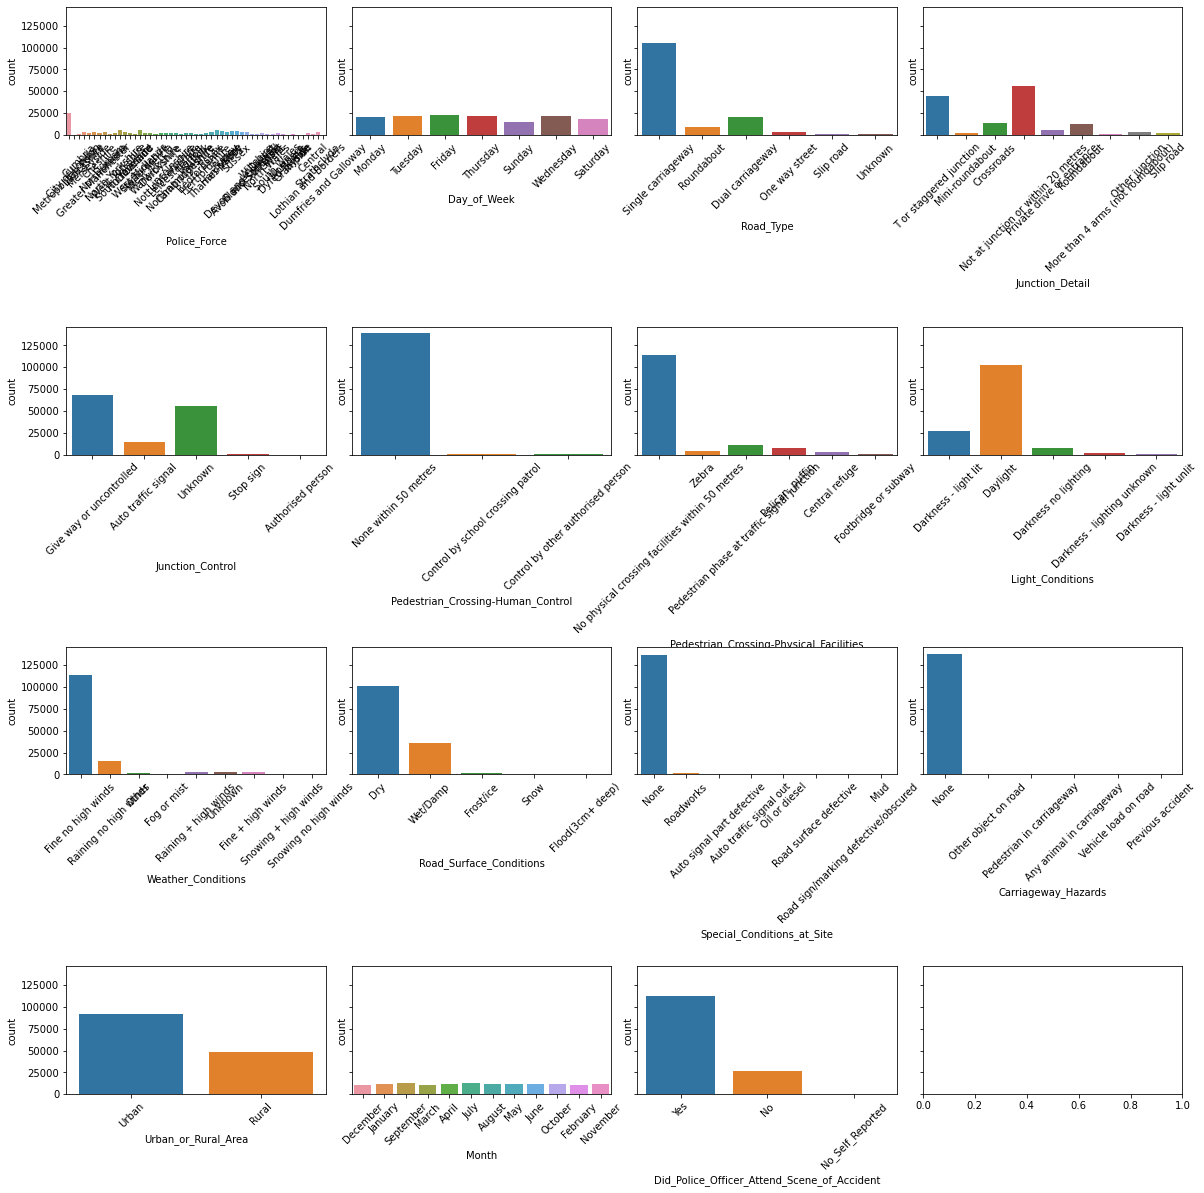

In [17]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20), sharey=True)
for i in range(len(cat_features)):
    chart = seaborn.countplot(x=cat_features[i], data=data, ax=axes[i // 4, i % 4])
#     plt.gcf().autofmt_xdate()
    plt.subplots_adjust(wspace=0.1,hspace=1.5)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

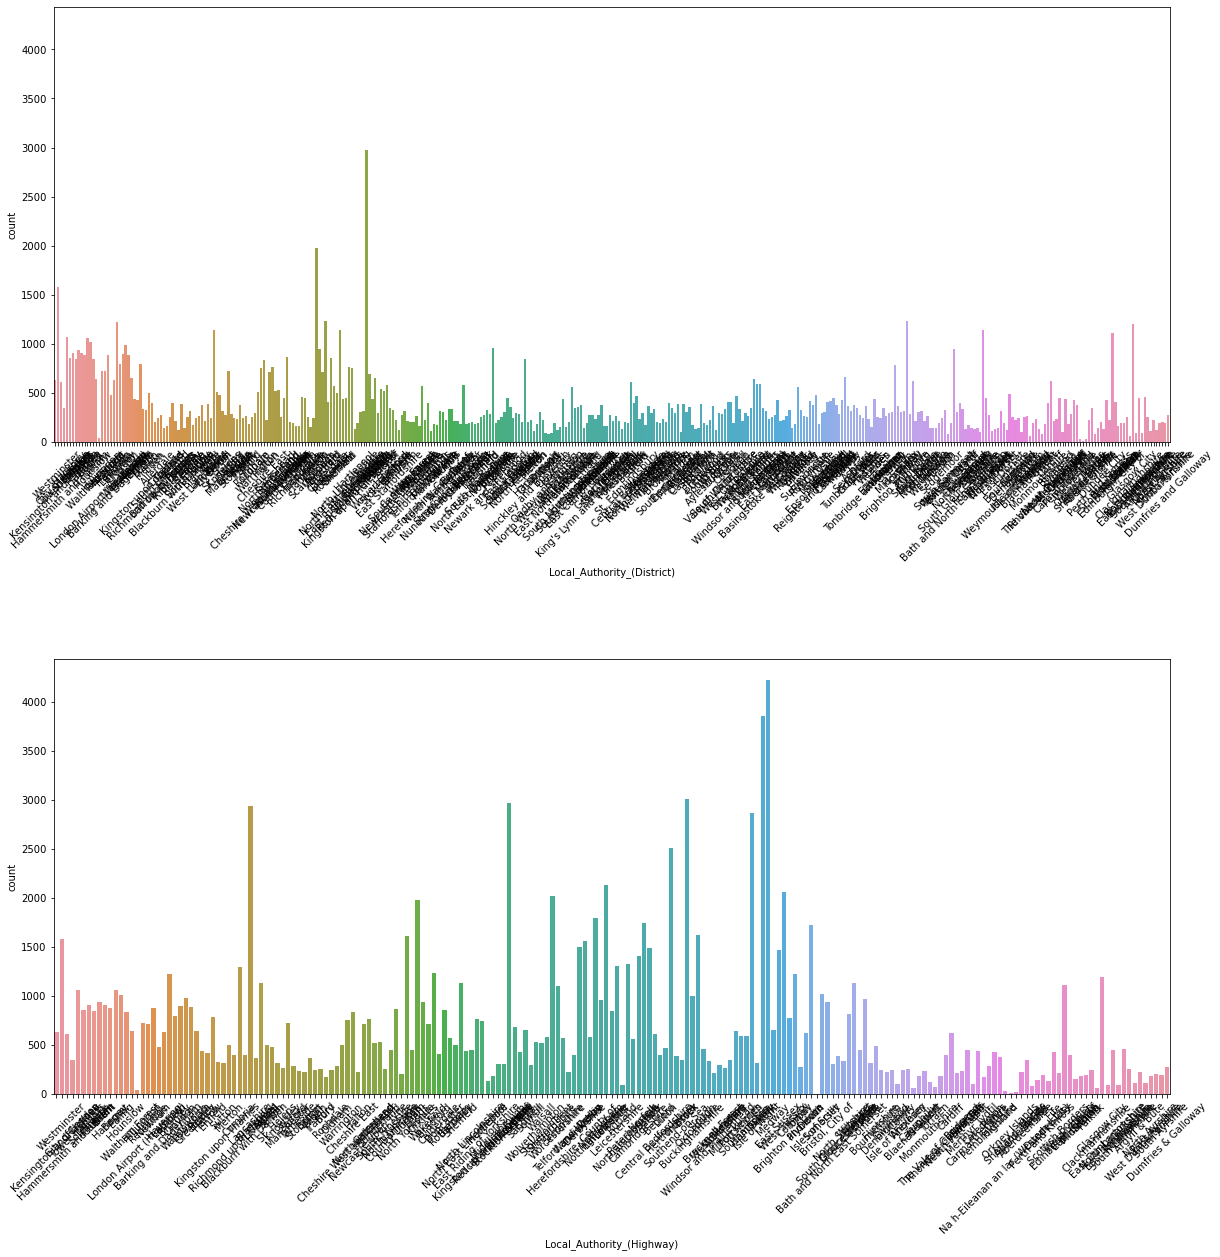

In [92]:
fig, axes = plt.subplots(2, 1, figsize=(20, 20), sharey=True)
features = ['Local_Authority_(District)', 'Local_Authority_(Highway)']
for i in range(len(features)):
    chart = seaborn.countplot(x=features[i], data=data, ax=axes[i % 2])
#     plt.gcf().autofmt_xdate()
    plt.subplots_adjust(wspace=0.1,hspace=0.5)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [43]:
data_v2 = data.replace('None', np.nan)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140056 entries, 0 to 140055
Data columns (total 28 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Date                                         140056 non-null  datetime64[ns]
 1   Longitude                                    140056 non-null  float64       
 2   Latitude                                     140056 non-null  float64       
 3   Police_Force                                 140056 non-null  object        
 4   Accident_Severity                            140056 non-null  object        
 5   Number_of_Vehicles                           140056 non-null  int64         
 6   Number_of_Casualties                         140056 non-null  int64         
 7   Day_of_Week                                  140056 non-null  object        
 8   Time                                         140056 non-null  ob

C:\Users\yupes\anaconda3\envs\python-gis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Accident_Severity', ylabel='count'>

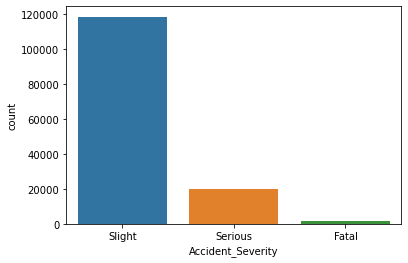

In [72]:
seaborn.countplot(data.Accident_Severity)

In [220]:
df_heatmap = data_v2[['Month', 'Day_of_Week']]
df_heatmap = pd.DataFrame(df_heatmap.value_counts()).reset_index()
df_heatmap = df_heatmap.pivot(index = 'Month', columns = 'Day_of_Week',values = 0)
df_heatmap.loc[list_month, days].style.background_gradient(cmap='Blues')

Day_of_Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Month,,,,,,,
January,1174,2126,2092,1997,1854,1461,1357
February,1885,1269,1586,1530,2023,1337,871
March,1381,2374,1189,1480,1995,1470,1060
April,1457,1646,2588,1701,1733,1374,1102
May,1468,1194,1615,2493,1645,1705,1449
June,1977,2230,1186,1236,2233,1456,1510
July,2116,1955,1986,1572,1802,1899,1050
August,1461,1577,1568,1998,1692,1465,1843
September,2536,1724,2179,1696,1822,1073,1366


In [221]:
df_heatmap = data_v2[['Hour', 'Day_of_Week']]
df_heatmap = pd.DataFrame(df_heatmap.value_counts()).reset_index()
df_heatmap = df_heatmap.pivot(index = 'Hour', columns = 'Day_of_Week',values = 0)
df_heatmap.loc[range(24), days].style.background_gradient(cmap='Blues')

Day_of_Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Hour,,,,,,,
0,212,194,158,213,216,432,517
1,138,110,108,142,157,357,418
2,73,76,60,102,114,326,334
3,77,61,67,105,79,240,290
4,79,57,64,90,73,182,224
5,175,176,180,152,172,189,195
6,438,459,529,449,426,222,229
7,1096,1240,1307,1243,1004,348,293
8,1726,1993,2096,1928,1667,514,331


<AxesSubplot:xlabel='Speed_limit'>

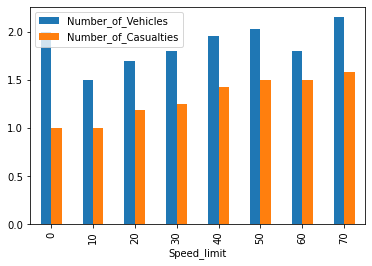

In [253]:
data_v2.groupby('Speed_limit').mean()[['Number_of_Vehicles', 'Number_of_Casualties']].plot(kind = 'bar')

<AxesSubplot:xlabel='Speed_limit'>

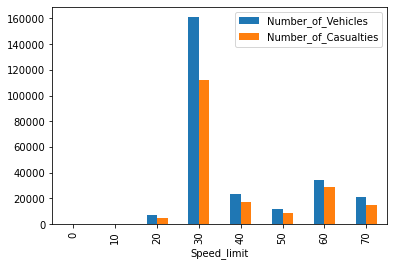

In [254]:
data_v2.groupby('Speed_limit').sum()[['Number_of_Vehicles', 'Number_of_Casualties']].plot(kind = 'bar')

# Modelling

Пример классификации на дереве решений по нумерным признакам

In [36]:
numbers_features = ['Number_of_Vehicles', 'Speed_limit', 'Longitude', 'Latitude', 'Day_of_Week_num',
                   'Month_num', 'Hour']

In [37]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# data_v2 = data_v2.sort_values('Date')
X=data[numbers_features] # Features
y=data['Accident_Severity']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [38]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [39]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8402075350453387


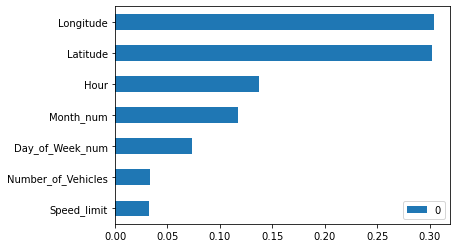

In [40]:
feature_imp = pd.DataFrame(clf.feature_importances_,index=numbers_features).sort_values(0,ascending=True)
feature_imp.plot(kind = 'barh')

In [41]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fatal       0.00      0.00      0.00       491
     Serious       0.24      0.02      0.03      6029
      Slight       0.85      0.99      0.91     35497

    accuracy                           0.84     42017
   macro avg       0.36      0.34      0.31     42017
weighted avg       0.75      0.84      0.78     42017



Нет фатальных исходов в прогнозе

(array([4.162e+04, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.900e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 7.000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

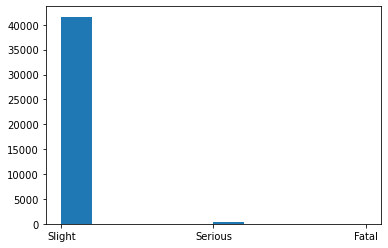

In [42]:
plt.hist(y_pred)

In [43]:
pd.Series(y_pred).value_counts()

Slight     41620
Serious      390
Fatal          7
dtype: int64

Accuracy: 0.7984679266895762
              precision    recall  f1-score   support

           0       0.39      0.09      0.14      8051
           1       0.82      0.97      0.89     33853

    accuracy                           0.80     41904
   macro avg       0.60      0.53      0.51     41904
weighted avg       0.74      0.80      0.74     41904



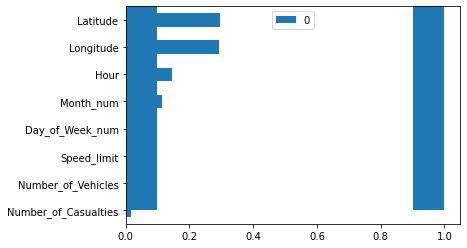

1    40092
0     1812
dtype: int64

In [57]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
df_temp = data.loc[data['Did_Police_Officer_Attend_Scene_of_Accident']!='No_Self_Reported'].copy()
df_temp['Response'] = df_temp['Did_Police_Officer_Attend_Scene_of_Accident'].replace({'Yes':1, 'No':0})
X=df_temp[numbers_features] # Features
y=df_temp['Response']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

feature_imp = pd.DataFrame(clf.feature_importances_,index=numbers_features).sort_values(0,ascending=True)
feature_imp.plot(kind = 'barh')

print(metrics.classification_report(y_test,y_pred))

plt.hist(y_pred)
plt.show()

pd.Series(y_pred).value_counts()

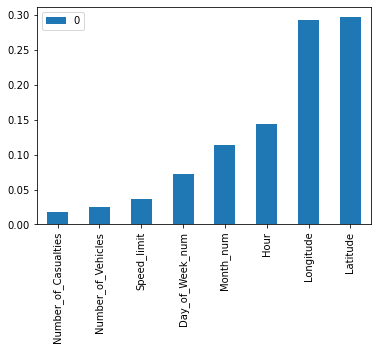

In [64]:
feature_imp.plot(kind = 'bar')

In [65]:
print(confusion_matrix(y_test, y_pred))

[[  709  7342]
 [ 1103 32750]]


In [73]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
df_temp = data.loc[data['Did_Police_Officer_Attend_Scene_of_Accident']!='No_Self_Reported'].copy()
df_temp['Response'] = df_temp['Did_Police_Officer_Attend_Scene_of_Accident'].replace({'Yes':1, 'No':0})
X=pd.get_dummies(df_temp[['Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week', 
       'Local_Authority_(District)', 'Local_Authority_(Highway)', 'Road_Type',
       'Speed_limit', 'Junction_Control',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Urban_or_Rural_Area',  'Month', 'Hour']]) # Features
y=df_temp['Response']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


Accuracy: 0.8048873615883925


ValueError: Shape of passed values is (705, 1), indices imply (8, 1)

Accuracy: 0.8048873615883925


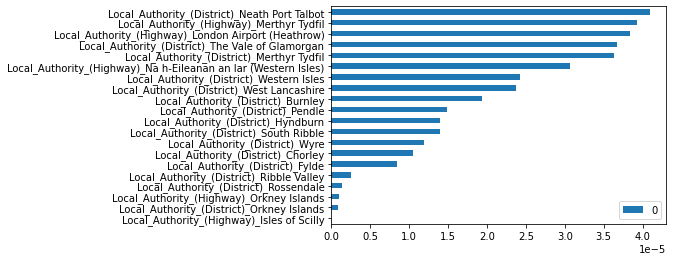

              precision    recall  f1-score   support

           0       0.50      0.14      0.22      8171
           1       0.82      0.97      0.89     33733

    accuracy                           0.80     41904
   macro avg       0.66      0.55      0.55     41904
weighted avg       0.76      0.80      0.76     41904

[[ 1129  7042]
 [ 1134 32599]]


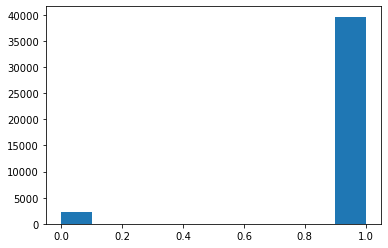

1    39641
0     2263
dtype: int64

In [78]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

feature_imp = pd.DataFrame(clf.feature_importances_,index=X.columns).sort_values(0,ascending=True)
feature_imp[:20].plot(kind = 'barh')
plt.show()

print(metrics.classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
plt.hist(y_pred)
plt.show()

pd.Series(y_pred).value_counts()

In [79]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
df_temp = data.loc[data['Did_Police_Officer_Attend_Scene_of_Accident']!='No_Self_Reported'].copy()
df_temp['Response'] = df_temp['Did_Police_Officer_Attend_Scene_of_Accident'].replace({'Yes':1, 'No':0})
X=pd.get_dummies(df_temp[['Police_Force', 'Accident_Severity',
        'Day_of_Week', 'Local_Authority_(District)', 'Local_Authority_(Highway)', 'Road_Type',
        'Junction_Control','Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Urban_or_Rural_Area',  'Month', ]]) # Features
numeric_features = ['Number_of_Vehicles', 'Number_of_Casualties','Speed_limit','Hour']
X[numeric_features] = df_temp[numeric_features]
y=df_temp['Response']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, random_state = 42)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


Accuracy: 0.8090874379534173


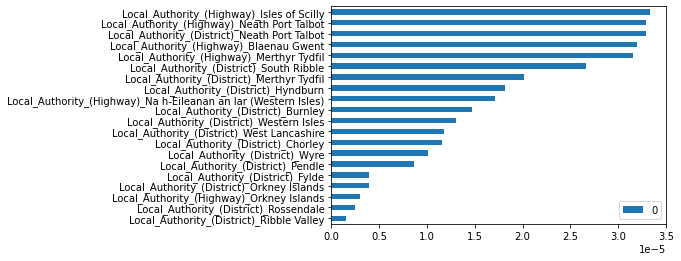

              precision    recall  f1-score   support

           0       0.50      0.14      0.22      7992
           1       0.83      0.97      0.89     33912

    accuracy                           0.81     41904
   macro avg       0.66      0.55      0.56     41904
weighted avg       0.76      0.81      0.76     41904

[[ 1143  6849]
 [ 1151 32761]]


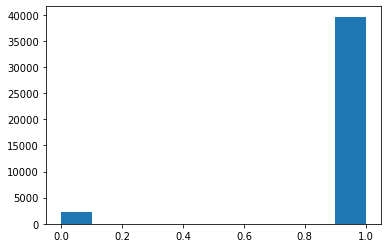

1    39610
0     2294
dtype: int64

In [80]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

feature_imp = pd.DataFrame(clf.feature_importances_,index=X.columns).sort_values(0,ascending=True)
feature_imp[:20].plot(kind = 'barh')
plt.show()

print(metrics.classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
plt.hist(y_pred)
plt.show()

pd.Series(y_pred).value_counts()

# Балансировка

In [12]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN

In [84]:
balances = {'name': ['Oversampling and undersampling','Undersampling', 'Oversampling'],
            'balance':[SMOTEENN(random_state=42),RandomUnderSampler(random_state=42),RandomOverSampler(random_state=42)],
           'accuracy':[]}

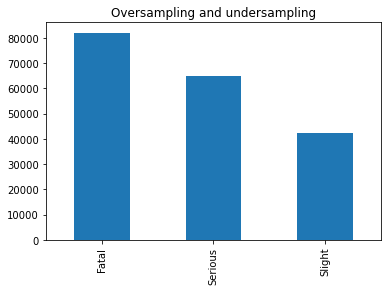

              precision    recall  f1-score   support

       Fatal       0.02      0.12      0.04       491
     Serious       0.19      0.46      0.27      6029
      Slight       0.88      0.61      0.72     35497

    accuracy                           0.58     42017
   macro avg       0.37      0.40      0.34     42017
weighted avg       0.77      0.58      0.65     42017



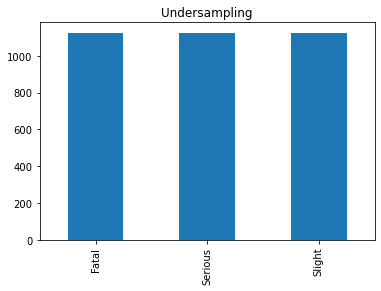

              precision    recall  f1-score   support

       Fatal       0.02      0.55      0.05       491
     Serious       0.17      0.34      0.23      6029
      Slight       0.89      0.48      0.62     35497

    accuracy                           0.46     42017
   macro avg       0.36      0.46      0.30     42017
weighted avg       0.78      0.46      0.56     42017



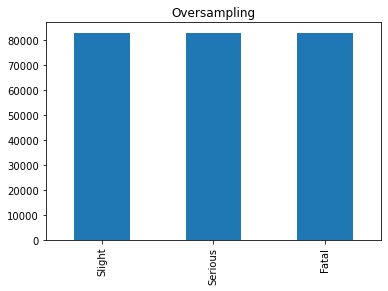

              precision    recall  f1-score   support

       Fatal       0.04      0.00      0.00       491
     Serious       0.22      0.06      0.09      6029
      Slight       0.85      0.96      0.90     35497

    accuracy                           0.82     42017
   macro avg       0.37      0.34      0.33     42017
weighted avg       0.75      0.82      0.78     42017



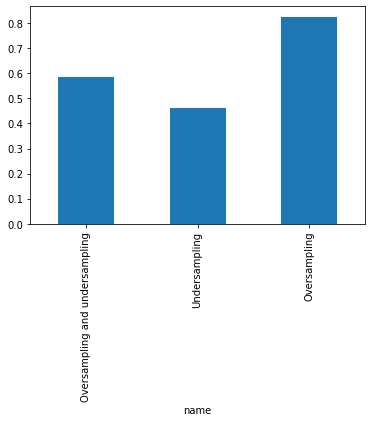

In [72]:
for i in range(3):
    imbl = balances['balance'][i]
    X_ousampled, y_ousampled = imbl.fit_resample(X_train, y_train)
    
    pd.Series(y_ousampled).value_counts().plot(kind = 'bar')
    plt.title(balances['name'][i])
    plt.show()
    
    clf=RandomForestClassifier(n_estimators=100)
    clf.fit(X_ousampled,y_ousampled)
    y_pred=clf.predict(X_test)
    balances['accuracy'].append(metrics.accuracy_score(y_test, y_pred))
    
    print(metrics.classification_report(y_test,y_pred))

pd.DataFrame(balances).set_index('name').accuracy.plot.bar()

{0: 'Fatal', 1: 'Serious', 2: 'Slight'}


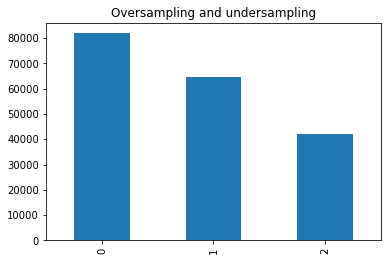

              precision    recall  f1-score   support

           0       0.02      0.12      0.04       463
           1       0.19      0.48      0.27      5957
           2       0.89      0.61      0.72     35597

    accuracy                           0.58     42017
   macro avg       0.37      0.40      0.34     42017
weighted avg       0.78      0.58      0.65     42017



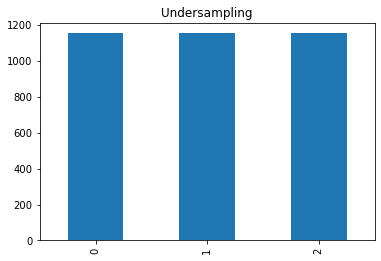

              precision    recall  f1-score   support

           0       0.03      0.62      0.05       463
           1       0.16      0.36      0.22      5957
           2       0.90      0.45      0.60     35597

    accuracy                           0.44     42017
   macro avg       0.36      0.47      0.29     42017
weighted avg       0.78      0.44      0.54     42017



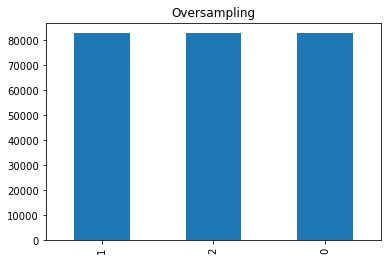

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       463
           1       0.23      0.06      0.10      5957
           2       0.85      0.97      0.90     35597

    accuracy                           0.83     42017
   macro avg       0.36      0.34      0.33     42017
weighted avg       0.75      0.83      0.78     42017



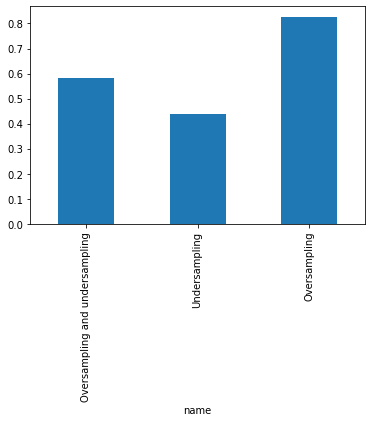

In [85]:
y=data['Accident_Severity'].astype('category').cat.codes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(dict( enumerate(data['Accident_Severity'].astype('category').cat.categories ) ))

for i in range(3):
    imbl = balances['balance'][i]
    X_ousampled, y_ousampled = imbl.fit_resample(X_train, y_train)
    
    pd.Series(y_ousampled).value_counts().plot(kind = 'bar')
    plt.title(balances['name'][i])
    plt.show()
    
    clf=RandomForestClassifier(n_estimators=100)
    clf.fit(X_ousampled,y_ousampled)
    y_pred=clf.predict(X_test)
    balances['accuracy'].append(metrics.accuracy_score(y_test, y_pred))
    
    print(metrics.classification_report(y_test,y_pred))

pd.DataFrame(balances).set_index('name').accuracy.plot.bar()

# Кросс-валидация

|Набор данных|Обозначение|
|:--|---|
|df_1|только на численных значениях|
|df_2|с энкодером категорий|
|df_3|с one hot энкодером|

In [10]:
# Import all the algorithms we want to test
# from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# Import the slearn utility to compare algorithms
from sklearn import model_selection
from sklearn import preprocessing

import tqdm

In [21]:
data_v2 = data_v2.loc[~data_v2.Did_Police_Officer_Attend_Scene_of_Accident.isna()].sort_values('Date')

In [22]:
data_v2.shape

(139679, 28)

**df_1**

In [62]:
df_1 = data[numbers_features]

**df_2**

In [100]:
district, d_unique = pd.factorize(data['Local_Authority_(District)'])
highway, h_unique = pd.factorize(data['Local_Authority_(Highway)'])
pd.DataFrame({'district':district, 'highway':highway}).corr().style.background_gradient(cmap='Blues')

,district,highway
district,1.000000,0.978364
highway,0.978364,1.000000


In [101]:
len(d_unique), len(h_unique)

(380, 207)

In [102]:
cat_features = ['Road_Type',
      'Junction_Detail', 'Junction_Control',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions','Urban_or_Rural_Area',
       'Local_Authority_(Highway)' ]

In [104]:
data[cat_features].head()

,Road_Type,Junction_Detail,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Local_Authority_(Highway)
0,Single carriageway,T or staggered junction,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - light lit,Fine no high winds,Dry,Urban,Kensington and Chelsea
1,Single carriageway,T or staggered junction,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Urban,Kensington and Chelsea
2,Single carriageway,Mini-roundabout,Give way or uncontrolled,None within 50 metres,Zebra,Darkness - light lit,Raining no high winds,Wet/Damp,Urban,Kensington and Chelsea
3,Single carriageway,Crossroads,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet/Damp,Urban,Kensington and Chelsea
4,Single carriageway,Crossroads,Auto traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Raining no high winds,Wet/Damp,Urban,Kensington and Chelsea


In [105]:
df_2 = data.copy()
le = preprocessing.LabelEncoder()
for i in cat_features:
    df_2[i] = le.fit_transform(data[i])

In [106]:
df_2 = df_2[cat_features+numbers_features]

**df_3**

In [113]:
cat_features = ['Road_Type',
      'Junction_Detail', 'Junction_Control',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions','Urban_or_Rural_Area' ]

In [114]:
ohe = preprocessing.OneHotEncoder()
data_3 = ohe.fit_transform(data[cat_features]).toarray()
columns = ohe.get_feature_names_out()
df_3 = pd.DataFrame(data_3, columns = columns)
for i in numbers_features:
    df_3[i] = data[i].tolist()

**df_4**

In [37]:
cat_features = ['Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions','Urban_or_Rural_Area']

In [38]:
ohe = preprocessing.OneHotEncoder()
data_4 = ohe.fit_transform(data[cat_features]).toarray()
columns = ohe.get_feature_names_out()
df_4 = pd.DataFrame(data_4, columns = columns)
for i in numbers_features:
    df_4[i] = data[i].tolist()

**df_5**

In [8]:
cat_features = ['Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions','Urban_or_Rural_Area',  'Local_Authority_(Highway)']

In [11]:
ohe = preprocessing.OneHotEncoder()
data_5 = ohe.fit_transform(data[cat_features]).toarray()
columns = ohe.get_feature_names_out()
df_5 = pd.DataFrame(data_5, columns = columns)
for i in numbers_features:
    df_5[i] = data[i].tolist()

In [125]:
# Prepare an array with all the algorithms
models = [
#     ('LR', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('SVC', SVC(random_state=42)),
    ('LSVC', LinearSVC(random_state=42, )),
    ('RFC', RandomForestClassifier(random_state=42)),
    ('DTR', DecisionTreeRegressor(random_state=42))
]

In [127]:
res = []
for i in tqdm.tqdm_notebook(range(100)):
    res.append(data.sample(10000)['Accident_Severity'].value_counts())
pd.DataFrame(res).describe()

<ipython-input-127-34b7cd0d13d2>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(100)):


,Slight,Serious,Fatal
count,100.000000,100.000000,100.000000
mean,8449.030000,1435.310000,115.660000
std,34.188561,34.111728,10.509467
min,8379.000000,1356.000000,85.000000
25%,8426.000000,1409.750000,110.000000
50%,8453.000000,1435.000000,115.000000
75%,8469.000000,1462.000000,121.250000
max,8529.000000,1508.000000,150.000000


стратификация - в 6ой курсе

StratifiedKFold

In [129]:
variants = []
variant = ['Только численные значения', "LabelEncoder", "OneHotEncoder_max", 'OneHotEncoder_min', "OneHotEncoder_Highway"]
datasets = [df_1, df_2, df_3, df_4, df_5]
for i in tqdm.notebook.tqdm(range(0, len(variant))):
    accuracies = []
    datasets[i]['Response'] = data['Accident_Severity'].astype('category').cat.codes.tolist()
    df = datasets[i].sample(10000)
    for name, model in tqdm.notebook.tqdm(models, total = len(models)):
        kfold = model_selection.StratifiedKFold()
        y = df['Response']
        X = df.drop(columns = ['Response'])  # Features
        cv_results = model_selection.cross_val_score(model, X, y, cv = kfold, scoring='accuracy')
        
        accuracies.append({'name':name,'mean':cv_results.mean(), 'std':cv_results.std(), 'results':cv_results})
    variants.append(pd.DataFrame(accuracies).sort_values('mean'))

<ipython-input-129-0d7b9384d2f8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasets[i]['Response'] = data['Accident_Severity'].astype('category').cat.codes.tolist()


C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


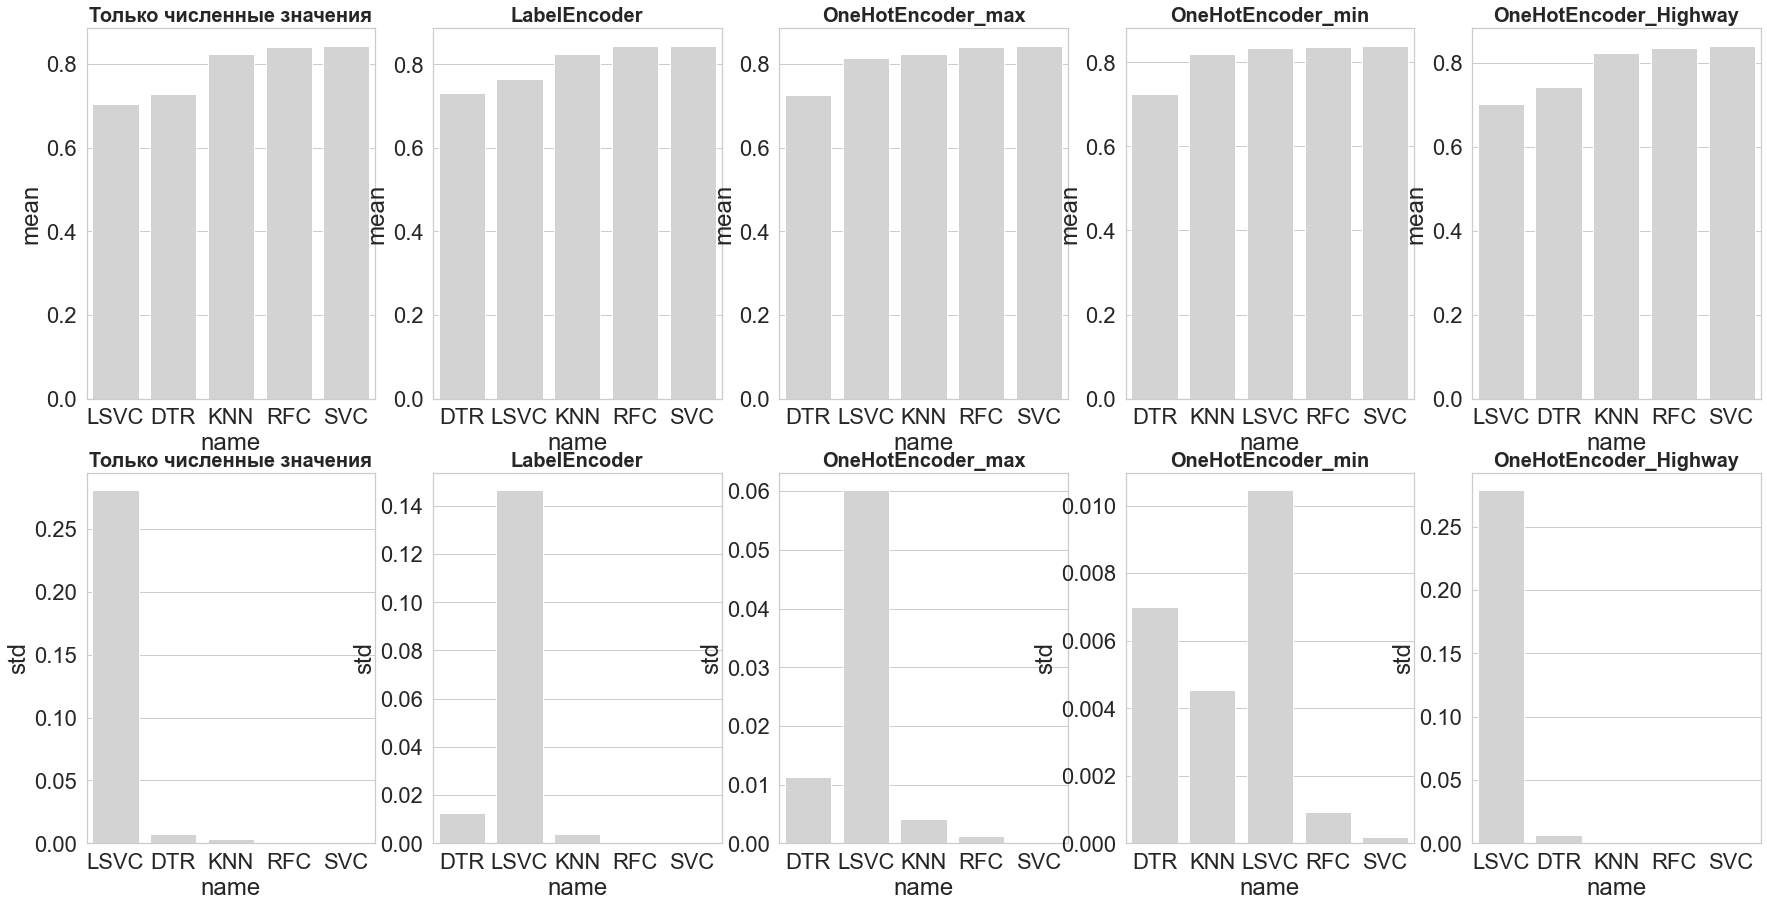

In [133]:
fig, axs = plt.subplots(ncols=5, nrows=2)
seaborn.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,15)
for i in range(0, 5):
    seaborn.barplot(x='name', y='mean', data=variants[i], ax=axs[0,i], color='lightgrey')
    axs[0,i].set_title(label = variant[i], size=20, weight='bold')
    seaborn.barplot(x='name', y='std', data=variants[i], ax=axs[1,i], color='lightgrey')
    axs[1,i].set_title(label = variant[i], size=20, weight='bold')

In [131]:
variants[i]

,name,mean,std,results
4,DTR,0.7242,0.006997,"[0.718, 0.7195, 0.7365, 0.7275, 0.7195]"
0,KNN,0.8189,0.004532,"[0.8215, 0.8145, 0.8125, 0.824, 0.822]"
2,LSVC,0.8349,0.010452,"[0.84, 0.84, 0.84, 0.814, 0.8405]"
3,RFC,0.8364,0.000917,"[0.8375, 0.8375, 0.8355, 0.8355, 0.836]"
1,SVC,0.8401,0.000200,"[0.84, 0.84, 0.84, 0.84, 0.8405]"


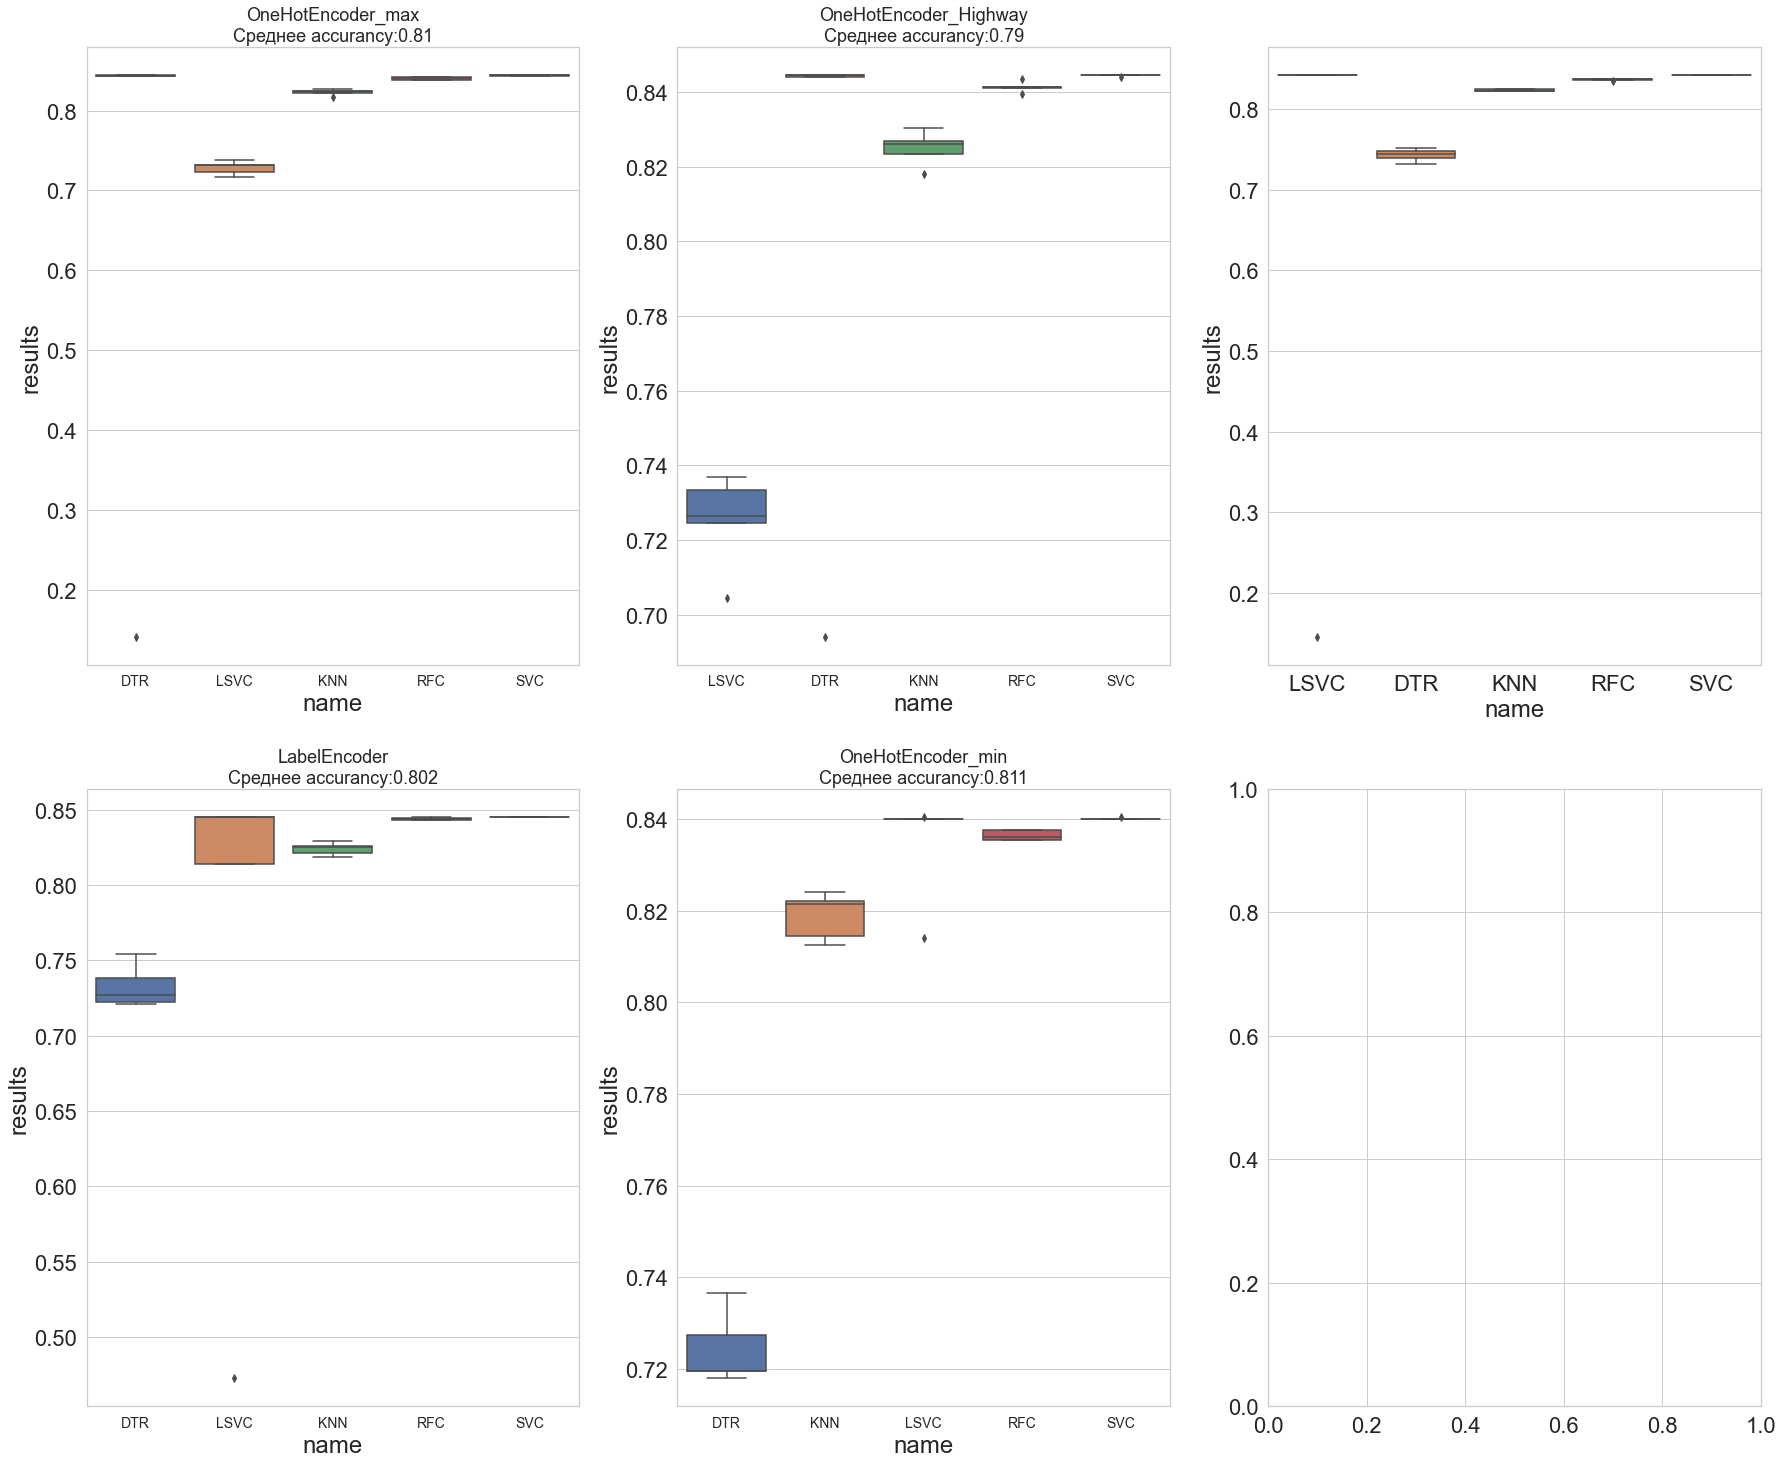

In [135]:
seaborn.set(style="whitegrid", color_codes=True, font_scale = 2)
fig, axs = plt.subplots(ncols=3, nrows=2)
fig.set_size_inches(30,25)
for i in range(0, 5):
    seaborn.boxplot(  y="results", x= "name", data=variants[i],  orient='v' , ax=axs[i%2,i//2])
# sns.boxplot(  y="c", x= "a", data=df,  orient='v' , ax=axes[1])
#     seaborn.boxplot(variants[i]['results'], ax=axs[i%2,i//2])
    axs[i%2, i//3].set_title(variant[i]+'\nСреднее accurancy:'+str(round(variants[i]['mean'].mean(),3)), size = 18)
    axs[i%2, i//3].set_xticklabels(variants[i]['name'], size = 14)
#     plt.show()

In [136]:
variants = []
variant = ['Только численные значения', "LabelEncoder", "OneHotEncoder_max", 'OneHotEncoder_min', "OneHotEncoder_Highway"]
datasets = [df_1, df_2, df_3, df_4, df_5]
for i in tqdm.notebook.tqdm(range(0, len(variant))):
    accuracies = []
    datasets[i]['Response'] = data['Accident_Severity'].astype('category').cat.codes.tolist()
    df = datasets[i].sample(10000)
    for name, model in tqdm.notebook.tqdm(models, total = len(models)):
        kfold = model_selection.StratifiedKFold()
        y = df['Response']
        X = df.drop(columns = ['Response'])  # Features
        balance = SMOTEENN(random_state=42)
        X_ousampled, y_ousampled = imbl.fit_resample(X, y)
        cv_results = model_selection.cross_val_score(model, X_ousampled, y_ousampled, cv = kfold, scoring='accuracy')
        
        accuracies.append({'name':name,'mean':cv_results.mean(), 'std':cv_results.std(), 'results':cv_results})
    variants.append(pd.DataFrame(accuracies).sort_values('mean'))

<ipython-input-136-951fbd8314af>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasets[i]['Response'] = data['Accident_Severity'].astype('category').cat.codes.tolist()


C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yupes\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


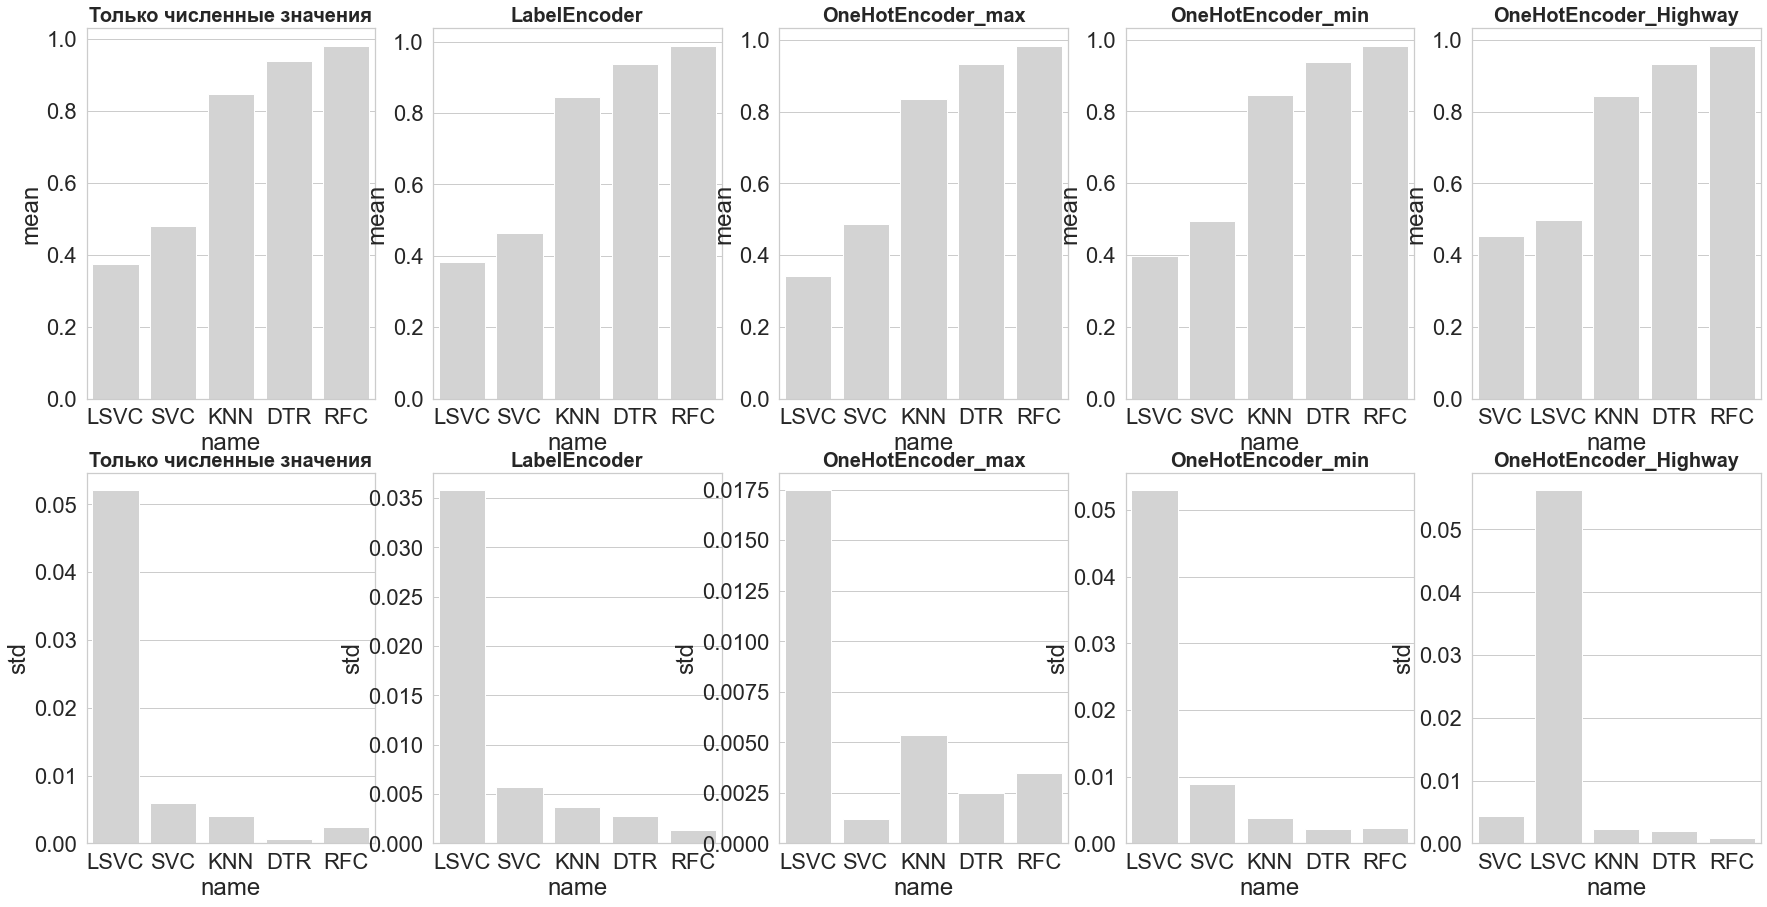

In [137]:
fig, axs = plt.subplots(ncols=5, nrows=2)
seaborn.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,15)
for i in range(0, 5):
    seaborn.barplot(x='name', y='mean', data=variants[i], ax=axs[0,i], color='lightgrey')
    axs[0,i].set_title(label = variant[i], size=20, weight='bold')
    seaborn.barplot(x='name', y='std', data=variants[i], ax=axs[1,i], color='lightgrey')
    axs[1,i].set_title(label = variant[i], size=20, weight='bold')

In [145]:
for v in variants

,name,mean,std,results
2,LSVC,0.373499,0.052064,"[0.3333333333333333, 0.3333333333333333, 0.333..."
1,SVC,0.478834,0.005967,"[0.48106508875739645, 0.4747534516765286, 0.47..."
0,KNN,0.847674,0.004005,"[0.8447731755424063, 0.8546351084812623, 0.845..."
4,DTR,0.940111,0.000566,"[0.9400394477317554, 0.9400394477317554, 0.939..."
3,RFC,0.981852,0.002367,"[0.9777120315581854, 0.9848126232741617, 0.982..."


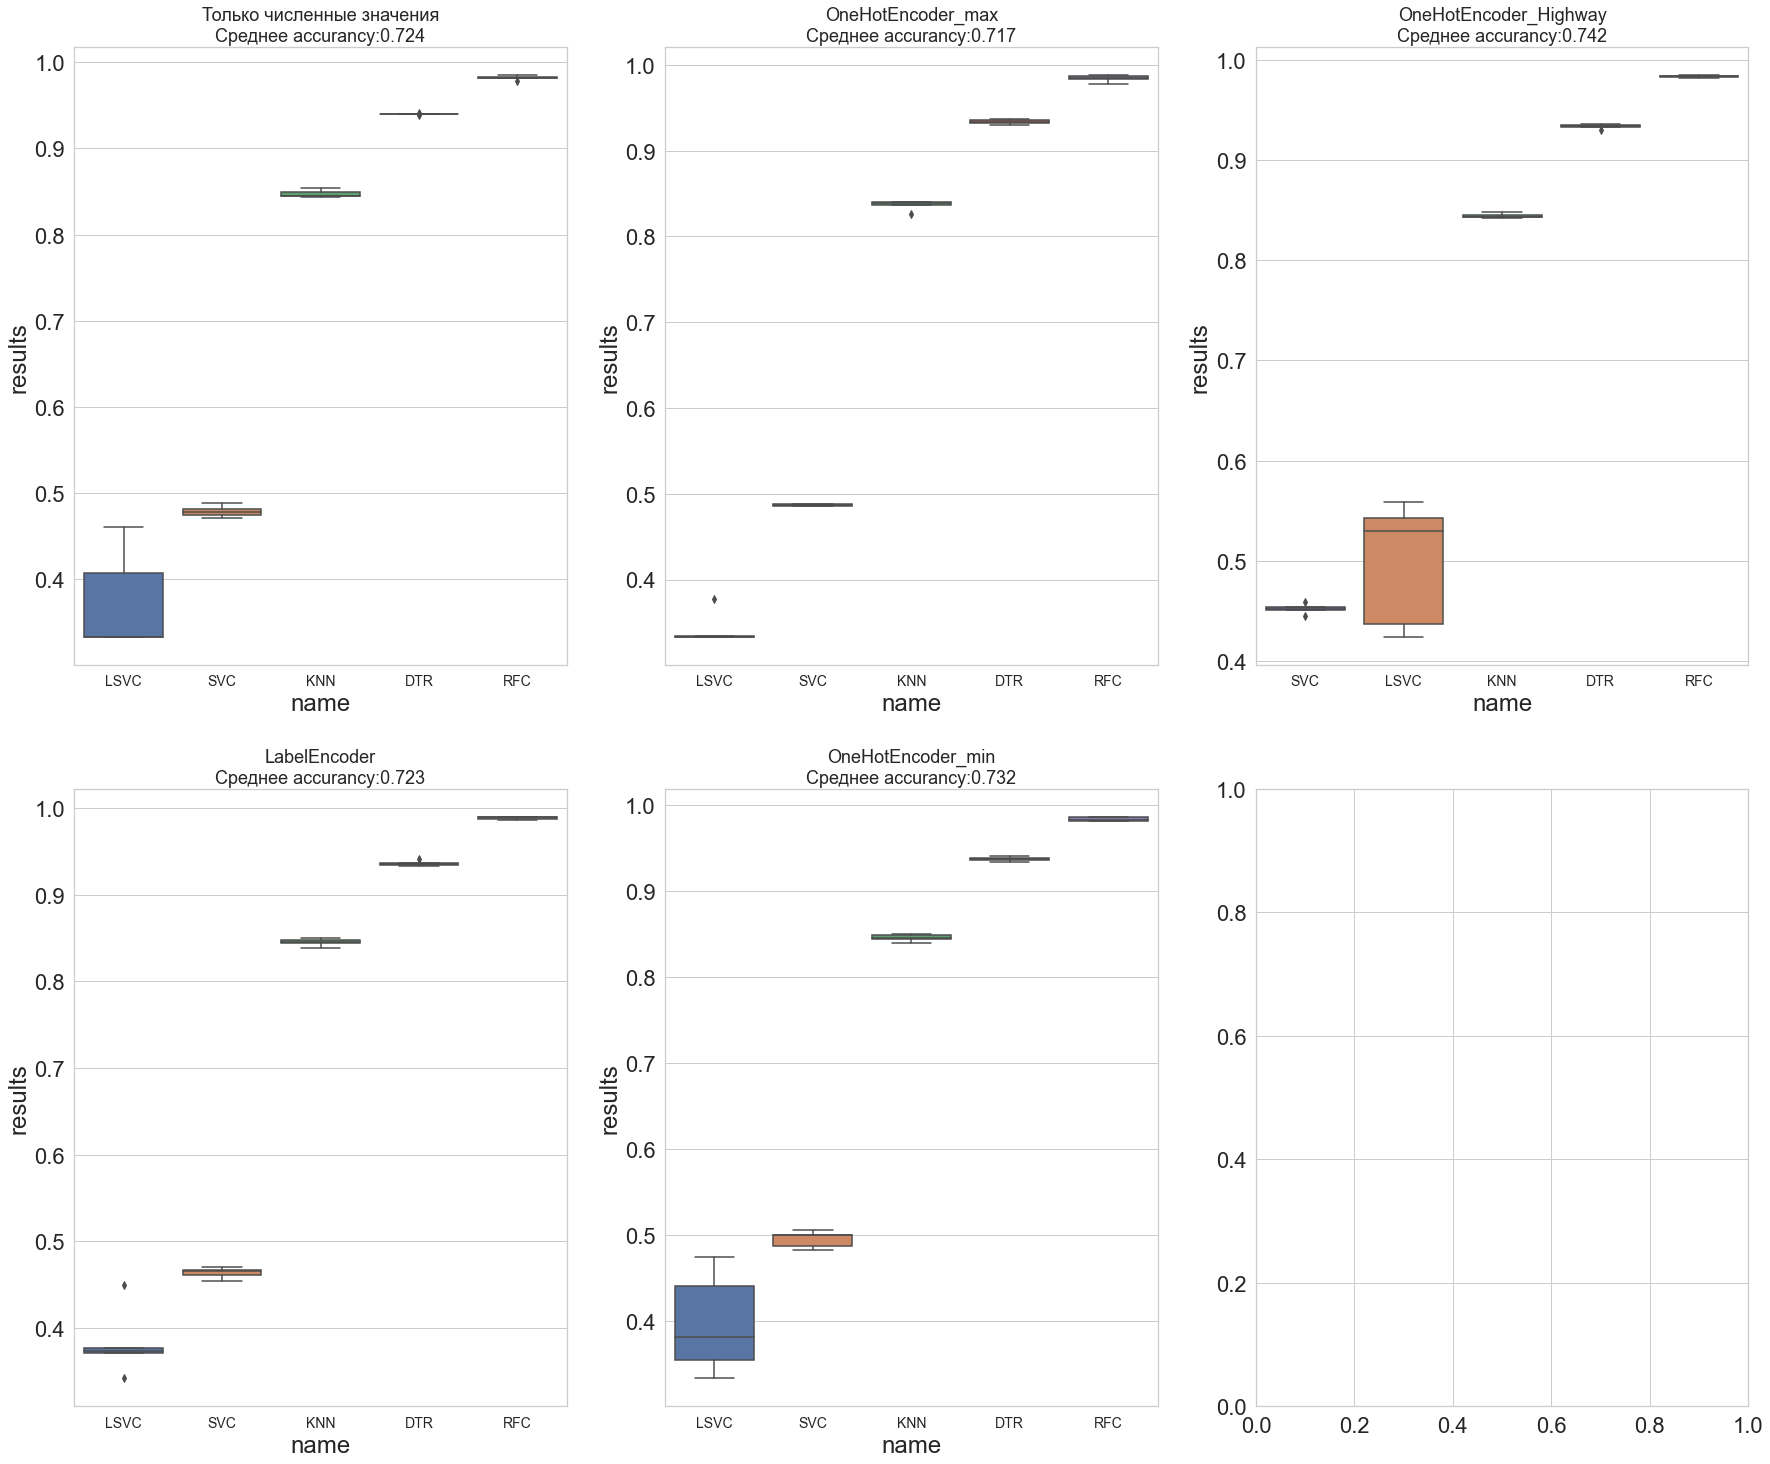

In [149]:
seaborn.set(style="whitegrid", color_codes=True, font_scale = 2)
fig, axs = plt.subplots(ncols=3, nrows=2)
fig.set_size_inches(30,25)
for i in range(0, 5):
    seaborn.boxplot(  y="results", x= "name", data=variants[i],  orient='v' , ax=axs[i%2,i//2])
# sns.boxplot(  y="c", x= "a", data=df,  orient='v' , ax=axes[1])
#     seaborn.boxplot(variants[i]['results'], ax=axs[i%2,i//2])
    axs[i%2, i//2].set_title(variant[i]+'\nСреднее accurancy:'+str(round(variants[i]['mean'].mean(),3)), size = 18)
    axs[i%2, i//2].set_xticklabels(variants[i]['name'], size = 14)
#     plt.show()

# GS

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [23]:
X=df_5 # Features
y=data['Accident_Severity']  # Labels
imbl = SMOTEENN(random_state = 42)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7) # 70% training and 30% test
X_ousampled, y_ousampled = imbl.fit_resample(X_train, y_train)

In [24]:
model = RandomForestClassifier(n_estimators=100, random_state = 42)

In [25]:
model.fit(X_ousampled, y_ousampled)

RandomForestClassifier(random_state=42)

In [26]:
y_pred = model.predict(X_test)

In [27]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       Fatal       0.05      0.04      0.04      1127
     Serious       0.21      0.46      0.29     14058
      Slight       0.88      0.70      0.78     82855

    accuracy                           0.66     98040
   macro avg       0.38      0.40      0.37     98040
weighted avg       0.77      0.66      0.70     98040

[[   40   659   428]
 [  173  6525  7360]
 [  616 24414 57825]]


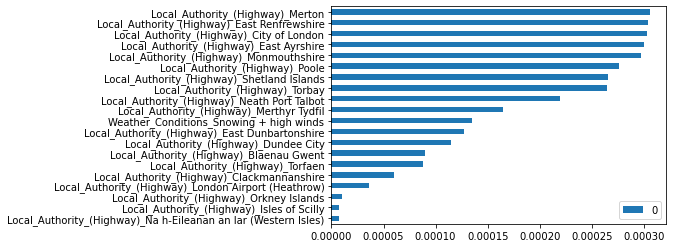

In [35]:
feature_imp = pd.DataFrame(model.feature_importances_,index=df_5.columns).sort_values(0,ascending=True)
feature_imp[:20].plot(kind = 'barh')

              precision    recall  f1-score   support

       Fatal       0.03      0.06      0.04      1125
     Serious       0.20      0.46      0.28     14090
      Slight       0.88      0.67      0.76     82825

    accuracy                           0.63     98040
   macro avg       0.37      0.40      0.36     98040
weighted avg       0.77      0.63      0.68     98040

[[   69   644   412]
 [  420  6526  7144]
 [ 1706 25909 55210]]


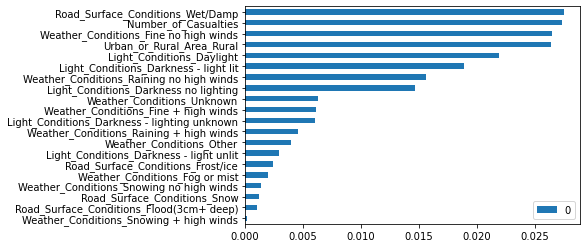

In [40]:
X=df_4 # Features
y=data['Accident_Severity']  # Labels
imbl = SMOTEENN(random_state = 42)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7) # 70% training and 30% test
X_ousampled_4, y_ousampled_4 = imbl.fit_resample(X_train, y_train)

model_4 = RandomForestClassifier(n_estimators=100, random_state = 42)

model_4.fit(X_ousampled_4, y_ousampled_4)

y_pred = model_4.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

feature_imp = pd.DataFrame(model_4.feature_importances_,index=df_4.columns).sort_values(0,ascending=True)
feature_imp[:20].plot(kind = 'barh')

In [42]:
data['Did_Police_Officer_Attend_Scene_of_Accident'].unique()

array(['Yes', 'No', 'No_Self_Reported'], dtype=object)

In [44]:
df_temp = df_4 # Features
df_temp['Accident_Severity'] = data['Accident_Severity'].astype('category').cat.codes
df_temp['Response']=data['Did_Police_Officer_Attend_Scene_of_Accident']
df_temp = df_temp.loc[df_temp.Response!='No_Self_Reported']
print(df_temp.shape)
df_temp['Response'].replace({'Yes':1, 'No':0}, inplace = True)
X = df_temp.drop(columns = 'Response')
y = df_temp['Response']
imbl_over = RandomOverSampler(random_state = 42)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7) # 70% training and 30% test

X_oversampled, y_oversampled = imbl_over.fit_resample(X_train, y_train)

(139679, 31)


C:\Users\yupes\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [45]:
model_os = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [46]:
model_os.fit(X_oversampled, y_oversampled)

RandomForestClassifier(random_state=42)

In [47]:
y_pred = model_os.predict(X_test)

In [48]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.23      0.29     18952
           1       0.83      0.92      0.87     78824

    accuracy                           0.78     97776
   macro avg       0.62      0.57      0.58     97776
weighted avg       0.75      0.78      0.76     97776

[[ 4362 14590]
 [ 6589 72235]]


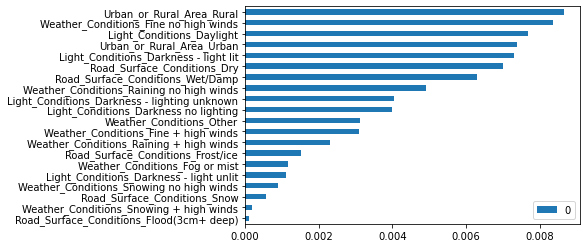

In [50]:
feature_imp = pd.DataFrame(model_os.feature_importances_,index=df_temp.drop(columns = 'Response').columns).sort_values(0,ascending=True)
feature_imp[:20].plot(kind = 'barh')

              precision    recall  f1-score   support

           0       0.30      0.63      0.40     18919
           1       0.88      0.64      0.74     78857

    accuracy                           0.64     97776
   macro avg       0.59      0.64      0.57     97776
weighted avg       0.77      0.64      0.68     97776

[[11863  7056]
 [28155 50702]]


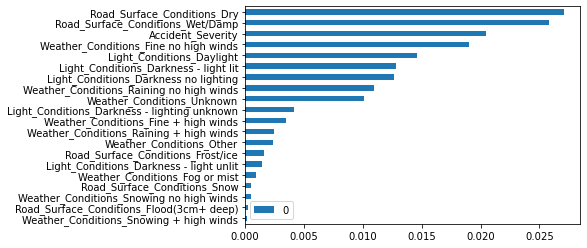

In [52]:
X = df_temp.drop(columns = 'Response')
y = df_temp['Response']
imbl = SMOTEENN(random_state = 42)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7) # 70% training and 30% test
X_ousampled_4, y_ousampled_4 = imbl.fit_resample(X_train, y_train)

model_4 = RandomForestClassifier(n_estimators=100, random_state = 42)

model_4.fit(X_ousampled_4, y_ousampled_4)

y_pred = model_4.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

feature_imp = pd.DataFrame(model_4.feature_importances_,index=df_temp.drop(columns = 'Response').columns).sort_values(0,ascending=True)
feature_imp[:20].plot(kind = 'barh')

In [173]:
param_grid = {
        'n_estimators'  : [50, 100, 200, 700],
        'max_features'  : ['auto', 'sqrt', 'log2'],
        "criterion"     : ["gini", "entropy"],
        "max_features"  : [3, 5],
        'max_depth'     : [8, 9, 10, 11, 12]
    }

In [174]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose=2)

In [ ]:
grid.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=1, gamma=1, kernel=linear .....................................


In [ ]:
grid.best_params_

In [ ]:
y_pred = grid.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))